# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [20]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

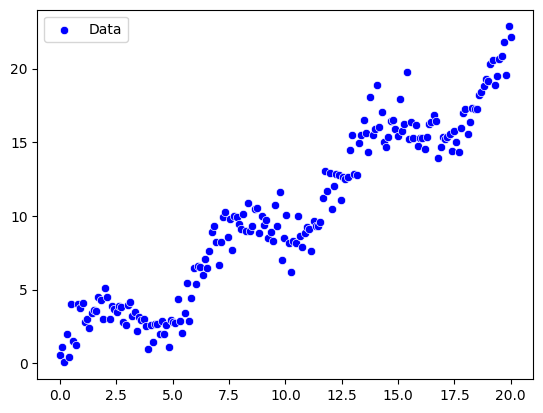

In [21]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [22]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [23]:
df = Simple1DRegressionDataset(X,y)


In [24]:
df[0]


(tensor([0.]), tensor([0.5908]))

In [25]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [26]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[8.8729]])]

In [27]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)
model_2 = nn.Sequential(
    nn.Linear(in_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_features)
)

In [28]:
loss_fn = nn.MSELoss()

In [29]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [30]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [32]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.961434364318848
111.54708957672119
245.40136814117432
321.1268320083618
382.86992740631104
390.3525505065918
638.7888450622559
808.5852012634277
945.4317436218262
946.1123887896538
963.5386316180229
963.5486675370485
966.8214660752565
1052.0762344468385
1055.4986940491945
1262.80621968396
1413.456839190796
1413.7328253854066
1425.9529095757753
1455.1275941003114
1722.0259705651551
1728.420193778351
1728.5778649765998
1767.0449708420783
1808.889376970008
1954.4864076096565
1954.9068515915424
1958.3999536652118
2009.264043631032
2009.2813281081617
2112.473985578865
2161.391870405525
2258.022302534431
2458.716836836189
2473.4684485457838
2531.285907652229
3048.724140074104
3114.076579954475
3441.0681571029127
3443.9555291198194
3525.078743841499
3706.7143486998975
3707.165540482849
3927.4442727826536
3947.990417268127
4172.45846536383
4210.791286256164
4212.839204099029
4217.165958669037
4217.688453998417
4217.990961547941
4218.002714095637
4218.013658238575
4220.927864743397
4226.07278

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

101.81008911132812
105.63028979301453
151.42609286308289
369.45540499687195
584.3654696941376
757.0719516277313
924.0981967449188
925.5348148345947
927.9980866909027
1115.105584859848
1115.6979422569275
1272.0450949668884
1273.776607632637
1431.0186578035355
1431.0190874779073
1554.9443346702901
1554.9856320240942
1861.287115178391
2184.4647580006567
2186.0094093897787
2186.4752001979796
2338.0293231227843
2522.2909198024718
2538.723098299786
2582.8229289272276
2591.175487063214
2748.508967898175
2823.6676516750304
2824.230535826966
3135.4855712273566
3303.2648223259894
3303.506712145492
3304.365435785934
3306.176644630119
3400.9294675060955
3401.8156521984783
3791.402291602775
3856.4934781262127
3856.652089051291
3856.7217910581676
3882.9204604917613
3883.0351911404578
4011.1079450467078
4183.720341286942
4345.374302468583
4378.963158211991
4380.555181465432
4570.530736885354
4594.727247200295
4626.608621559426
4852.767358742043
4880.354522667214
4883.161309681222
4926.7612280467
5165

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.880753517150879
91.51107120513916
111.47768688201904
113.51726722717285
123.00303268432617
123.717021048069
152.16742426156998
152.90565383434296
230.6525639295578
254.36107528209686
270.55143439769745
281.4521607160568
350.4465454816818
372.1804302930832
376.2302922010422
559.7808293104172
588.9848927259445
607.5171650648117
655.5987385511398
731.781027674675
756.5911263227463
769.7154492139816
788.2703369855881
817.9198445081711
819.9412015676498
825.0084961652756
830.2091826200485
896.7132185697556
947.3399809598923
1003.9426535367966
1087.474971652031
1108.5566538572311
1159.7000025510788
1207.8289088010788
1208.8944339752197
1266.225378036499
1292.6277103424072
1310.4264545440674
1314.0369114875793
1315.0501405000687
1358.410495877266
1411.452446103096
1411.6042140424252
1431.0858138501644
1432.165731281042
1532.6367319524288
1534.153205960989
1553.0136319100857
1559.8579145371914
1576.1005159318447
1578.772720426321
1579.1932948827744
1599.0385173559189
1712.028179526329
1718.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.320438027381897
1.3205045137146953
45.06959280106821
70.38698515031138
109.2445710572938
110.31598922345438
128.4549872550706
170.94361945721903
220.8432585868577
251.83064338300028
252.37902101609507
261.23567518327036
286.58129057023325
340.8303292665223
386.98627409074106
433.8785241517762
463.56615957352915
584.7111409578065
637.4087613496522
667.074357357953
667.1258211072127
688.8664998944441
689.5549992855231
746.2195653255621
746.7530064519087
748.4256033833663
773.7012896474043
774.6799564893881
831.9552555616538
867.2502422865073
869.0282824571768
871.3651679094473
901.5544283922354
937.8471415575186
937.8775194558839
951.4248779687623
955.1048100862245
1001.39235815141
1044.3511937532166
1049.4215629968385
1105.118748513196
1134.2847603234986
1164.8508137140016
1219.6692417535523
1223.5355399522523
1230.5931013498048
1266.0883329782228
1302.418430176709
1459.13667663667
1497.4863546762208
1498.5398939523438
1536.431697693799
1541.8278711709718
1595.2141168985108
1660.26167

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.56076431274414
22.609073638916016
26.040193796157837
76.03560090065002
90.04540371894836
131.99491620063782
135.83354496955872
152.50873494148254
154.89556860923767
208.0094029903412
208.0104498254368
221.5636772500584
323.1453499185154
345.8279995309422
348.1495732652256
362.30541127792094
395.8871487962315
448.51140874496195
451.403908668668
451.4607855180511
465.64824164903257
484.87880195176695
567.0153452256927
662.8899942735443
723.1425348619232
727.7422324517975
768.0042983392486
783.3885995248565
833.7835351327667
845.2336026529083
916.3540555337677
967.0638409951935
974.955498347641
979.0068322519073
987.7883340219269
1045.8641282418976
1046.1632891694317
1150.9906359711895
1255.531560043455
1255.9777002433548
1256.3616343239555
1259.1747375229606
1274.5796828964958
1358.465730259777
1405.5869155625114
1407.977855751873
1425.1311226586113
1484.0813942650566
1486.4247308472404
1489.2437842587242
1494.5723150471458
1522.7986906269798
1526.3650587300071
1528.4774349430809
1528

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

113.52432250976562
169.92227172851562
177.63885307312012
181.00248432159424
233.74795246124268
255.290753364563
255.30236428696662
256.3106268020347
257.4670142503455
322.89675515610725
379.8833464952186
379.980960582383
438.7455823170021
511.8688962208107
524.7616574512795
526.9702987419441
542.6986198173836
546.821532224305
651.3282460914925
755.6476506935433
756.9718430982903
757.7186149107292
891.2858146177605
893.221960757859
951.1376712070778
962.9871976124123
963.033323389478
963.1115809800103
963.1742233978584
966.290003512986
973.2092344509438
977.082280610688
1001.0588679062203
1029.2442373977974
1038.437212442048
1038.6266280608252
1047.891040940769
1062.2837268309668
1082.7786780791357
1108.8341876463965
1109.2320941882208
1111.1924402909353
1111.491149683483
1146.9255445199087
1147.3187630372122
1147.3801399329677
1149.4745272258297
1176.6040323833004
1176.6226008692756
1176.6870480636135
1177.8643311122432
1178.981568322517
1217.535565362312
1230.481674180366
1233.5482127

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8419349193572998
0.8604978173971176
57.58924613893032
80.742884978652
101.38101707398891
103.27077148854733
155.7887196391821
181.49922607839108
268.8509106487036
280.41904209554195
285.68212412297726
323.4145498126745
323.76534585654736
330.5258834809065
371.0793617218733
376.04178504645824
377.80104057490826
378.2910389751196
380.8002147525549
383.1483158916235
386.02902649343014
400.47002838552
444.7043690532446
448.75968883931637
496.0142664760351
508.5484690517187
518.7704062312841
534.5000128597021
636.8294043391943
692.5533232539892
730.1956992000341
741.8370375484228
752.3733572810888
764.3821415752172
808.4282536357641
825.5175461620092
833.3509797900915
859.3835668414831
860.8074503988028
860.8738572150469
871.6863839179277
887.2891013175249
888.1472355872393
892.7624699622393
911.5179268866777
941.3724171668291
944.0438642054796
961.8077840358019
961.9040167853236
987.9276850745082
988.1167196556926
992.5200747773051
997.2081026360393
1011.3692764565349
1011.3722549874801


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.787635803222656
24.83871603012085
26.358470797538757
29.155901312828064
29.15608146323939
29.408340062043862
32.2903991593339
32.57329183354159
33.55748849644442
33.723180632136064
33.794138084194856
34.48704583480139
34.48818049582769
34.961713112919824
34.96171918096752
43.72418847265453
65.45297875585766
71.82843318166942
72.08243998470516
104.33263071956844
105.92309125843258
114.36534532489986
120.52494224491329
121.24253162327022
121.33096902402849
121.55505682858438
122.25582678946466
123.05851789149256
123.375263262119
123.99497561487169
124.1370261344573
125.16998917194815
125.24334227624149
128.73049723687382
130.19235491337986
131.68287157597752
134.4622702557108
135.02695679249973
135.3511246401331
135.3947690199575
140.41244823443503
150.55835277545066
151.0473123263082
151.3093333910665
153.92996460902305
154.25919691431136
155.6356726061067
156.72474387991042
158.21652749883742
158.2577105905375
159.4766842271647
167.92021621721597
184.08237518328042
186.5886405851206

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7053154706954956
1.5391288995742798
4.380245327949524
4.391641605645418
12.006779182702303
14.515404928475618
52.33397792652249
52.6591298468411
71.78610586002469
76.49077295139432
76.4908576984817
88.97979698376002
91.02611837581935
91.25578426615539
92.96830665365997
109.16301833884063
110.15535979763808
116.30646234051528
118.955361657303
134.29043512837234
134.72070875064674
135.66011264221015
136.23162349359336
153.22599681512656
173.7130649913961
178.07390960351768
196.55844100610557
244.67062362329307
244.74243389115873
253.34077583299222
260.8374765966946
262.6155104492718
271.5141167496258
272.2342328880841
275.9036865089947
275.98527113394084
275.98769478359463
279.02863029995206
287.88216881313565
289.7519286111856
292.3008943037057
293.9023702577615
294.4279335574174
319.4483650759721
320.94423769274
320.9864237145448
322.49086879053357
323.1597132519746
323.3358386442924
323.34432933897915
323.35702149150165
323.4186732354501
325.52607770589384
325.5604695263246
342.9950

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.734280109405518
7.99456000328064
9.860918402671814
11.450026154518127
12.399118304252625
14.10424554347992
14.419185787439346
14.478246621787548
14.688011668622494
14.848774440586567
16.007014758884907
36.67668104916811
37.23870623856783
59.220983155071735
66.87388146668673
71.89356578141451
72.93824148923159
73.22731528431177
73.44732267409563
76.27228624373674
77.24772352725267
77.38588675111532
79.7532821521163
104.53571852296591
137.57714232057333
140.30915673822165
144.54995044320822
147.231162391603
152.2682455405593
153.13556375354528
156.15145244449377
159.03724136203527
170.79207076877356
171.10854648798704
172.91028355807066
174.4482265636325
174.6931782886386
176.8462508842349
177.30808597058058
177.59287380427122
177.59368385875132
177.83830623829272
178.0860093733063
186.03935419523623
194.9777191778412
232.60842215025332
232.6893055042019
232.7065324796131
233.39841497072484
238.23927438387182
238.52571764716413
242.65253487357404
244.91666761168744
263.37408223876264
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.060923393815755844
3.040413673967123
3.971802767366171
4.274235840886831
4.624566610902548
5.002102341502905
5.172349002212286
7.526527430862188
22.48268797621131
25.563038136810064
26.641155626624823
44.48170318827033
45.55133142694831
51.74416580423713
52.16232335194945
54.411836978048086
54.502398151904345
57.327635664492846
57.83273293450475
67.5252292342484
88.93644787743688
112.03713490441442
112.03766437619925
114.69092842191458
117.7730061635375
118.07117684930563
118.55358686298132
120.23631765693426
121.64774253219366
122.01146157830954
124.27720817178488
124.27901405864395
125.00396204763092
125.16124359541573
126.50641409331001
127.26897630863823
127.27209835802205
128.85029214178212
137.4285725906957
137.88302379404195
138.85817712103017
138.91885665734299
139.40002716262825
140.0369386144448
140.3029351301957
142.44624162395485
149.56744933803566
150.00926721771248
151.50255823810585
159.58594561298378
159.59338353550993
161.69066952145658
164.43678186810575
185.0433473

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.831108808517456
2.203593611717224
2.3580760657787323
5.486495226621628
5.509399745613337
5.546915676444769
26.668774273246527
30.61007895693183
35.548230316489935
35.55563590954989
35.55568553528792
35.58665100320286
35.63386446445293
61.006978096655075
61.00699897944287
61.24894156395749
65.67689385353879
66.53420492350415
66.54502133927599
66.67457508943335
67.75965309045569
68.96620297334448
69.56511610648886
76.81338423393026
91.50611704490439
91.93857806823507
101.26736301086203
139.90897220275656
140.87530630729452
142.0630199303414
142.3303934623982
148.04941239855543
154.777164130428
154.99159081182734
160.90949328146235
164.31081373892084
164.79104004702822
174.79903660617128
175.29510186515108
190.4076754888083
191.45323835215822
193.52667651973024
193.7398367663409
197.00488980016962
197.00741137094155
204.83744467324868
211.28297079629556
221.25190580911294
242.523218522736
282.6618102890934
288.24341572351113
291.4365016324009
292.1083476049389
292.164188220122
295.16107

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6707277894020081
0.8729436248540878
1.5157484859228134
5.191787704825401
9.791139587759972
9.923176616430283
16.086163371801376
16.15024720132351
21.75184641778469
23.832509860396385
34.15414606034756
36.13470111787319
39.618754491209984
40.43365351855755
40.653416737914085
45.19176350533962
60.388084039092064
60.64346469938755
60.937932416796684
67.15291492640972
67.24258632212877
75.79093665629625
76.34643191844225
77.36749393492937
79.63134104758501
93.62370497733355
110.85864645987749
113.4614706709981
114.75399262458086
115.02808428555727
116.84781289845705
118.44997442513704
120.69641102105379
122.75029242783785
123.72097707539797
124.51908434182405
126.70201433449984
126.93229568749666
130.28947556763887
141.27327931672335
141.3283259049058
141.935186304152
142.70173285156488
143.0031315162778
147.96221555024385
154.14809144288301
157.12927425652742
157.65496201068163
161.9059342816472
164.32146353274584
171.1974815800786
174.44492454081774
184.69437331706285
187.0451278164982

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5092650055885315
2.00271075963974
5.0878161787986755
5.1136046927422285
5.670081285759807
18.428859857842326
18.43350675655529
48.67635229183361
51.47342875553295
59.13709881855175
63.51909115863964
63.897532909642905
67.8100986178033
68.7628455455415
69.20107021881267
86.74291172577068
88.2020989949815
88.33597904397175
99.86940342141315
102.8086062069051
103.5517348642461
103.57278710929677
104.34921181527898
104.87331527797505
108.3183032902889
108.33241263451055
109.88660768093541
110.00906856777146
116.69810589076951
117.14509402634576
117.72522668959573
117.7675972324796
138.06148913921788
172.94389346661046
176.13761929096654
176.2188878324814
177.74372389586642
179.06753721507266
179.11103607388213
194.49003006191924
195.70873678894714
196.50948781939223
197.7280123946257
199.40410895319656
200.61036546202376
206.94555957289413
208.78108460875228
211.0256620165892
211.5889036175795
215.01414365740493
229.7538125035353
246.1600453373976
246.88911921950057
253.24465091200545
25

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.631425857543945
12.968215942382812
16.190813064575195
28.13437557220459
31.384488105773926
34.97456622123718
34.980161905288696
35.30573269724846
36.39225396513939
54.26271256804466
54.66942140460014
59.76592418551445
59.76686151314061
69.5872026233701
72.34760172653478
76.8020909576444
77.309784725192
77.95720155525487
84.35338647651952
105.4763627796201
105.68096077430528
112.67873871314805
117.3508082627086
117.99015259731095
118.00409416563343
118.05875479138922
120.30061685002875
120.40005258179735
122.09480658627581
125.11684933758806
142.46069851971697
142.48263774893712
157.58306060812902
158.28890763304662
159.1207189419074
159.80903159163427
160.31818328879308
160.34502161934506
164.98441447212826
168.6505254645599
168.8965351273073
169.0092597369803
172.32312372967135
172.40885107114445
184.71972219541203
185.2573059637798
186.68001983955037
188.21975336864125
189.68186698749196
190.037086053635
191.1248261173023
191.2660497118486
191.38584868505131
193.12274102761876
193.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.55951988697052
2.646309494972229
2.6726424638181925
4.034114832058549
4.0567451529204845
4.176148351281881
14.779025968164206
28.065651830285788
28.09810784086585
30.791773822158575
31.60201432928443
38.352498319000006
39.543119218200445
51.17978551611304
55.12474134191871
65.44660451635718
66.67436745390296
68.81224611029029
70.15591933950782
73.46902635321021
75.74866631254554
82.87591698393226
83.13101747259498
83.35528498515487
85.06568151339889
94.49545770511031
95.68567746505141
95.75983138009906
102.53888220712543
102.55061486084014
107.89555886108428
112.42793896514922
112.89081582147628
113.03691325802356
113.48224992770702
114.24176843184978
116.08593184966594
116.6215888382867
120.33448804635555
120.62610114831477
127.78237499017268
128.5477179409936
128.94848830718547
146.24598319549114
150.34335715789348
151.97027273196727
154.92134923953563
155.39806149620563
155.84264082927257
156.33252708334476
156.38834651652724
158.8001094693318
159.95360263530165
163.32428654376417

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.2266652584075928
3.3857560604810715
12.61172442138195
12.999221101403236
15.158891215920448
21.142815604805946
21.54375021159649
21.9497137516737
30.863108679652214
34.981572672724724
35.08449438214302
39.11083057522774
40.27621307969093
74.96480026841164
86.18400612473488
89.11843004822731
92.98250833153725
94.24214938282967
96.80471614003181
99.12523224949837
102.70181754231453
102.89843666553497
102.91028644144535
104.4297965914011
106.41161073744297
106.42126293946058
109.12481137085706
111.07851787377149
111.20763810444623
111.4473940776661
111.62074885237962
112.13497052062303
112.48532784450799
114.26204193104059
114.33895460981876
115.63519374746829
124.94733135122806
126.01205734629184
126.4131779493764
141.177454453893
142.70982847828418
153.52415381092578
164.81374464649707
165.05457186419517
170.74626946169883
171.5792553992942
171.61861512903124
179.8261613631621
180.6388768935576
180.94689587596804
191.6779253864661
192.4091143393889
192.68077091220766
193.2707789326086

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.773567199707031
14.133963704109192
14.137551690917462
26.789987947326154
26.834386471193284
34.304091576021165
44.559263351839036
44.70351995853707
59.082717079203576
61.71825208095834
81.98453702358529
82.12524500815198
85.90286937681958
88.37386909453198
90.20967582194135
90.21596040623263
90.36621481971815
90.86853564577177
90.9288896699436
94.37861434416845
95.53561130957678
95.6256188605912
95.6302733682096
96.8079393170774
96.8219045419246
99.69049990363419
99.72538203187287
100.5545374173671
100.756113903597
105.36498297937214
112.20311679132283
113.8864563871175
113.97656782902777
115.43809112347662
118.18066772259772
119.24874695576727
121.55844386853278
123.50621064938605
124.28641071356833
124.83484628237784
133.9236123804003
134.98492052592337
135.01070337370038
135.40014432743192
138.15185712650418
140.6601748354733
141.3759186156094
144.72120331600308
144.79406069591641
150.06680868938565
150.0970076676458
155.67852727137506
157.81683555804193
163.72475925646722
163.86

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.0922045707702637
2.3013446033000946
2.4504040479660034
2.7695609629154205
3.8290081322193146
3.9656040519475937
4.178806573152542
4.266859821975231
4.314606092870235
7.489239118993282
16.47581424564123
18.048267386853695
18.054923643358052
18.937994052655995
19.106616725213826
22.683950652368367
34.08408569265157
34.41800882387906
37.81600143481046
40.127440948970616
40.15904469508678
40.49098686594516
40.50021036621183
41.741771063767374
41.91081067081541
42.92419227119535
44.556035718880594
45.02801164146513
48.98140676971525
51.012554249726236
52.091000518761575
52.95874866005033
56.35019501205534
56.493019378744066
56.538322309963405
70.04380879830569
91.03578267525882
92.47679863404483
94.16315362881869
101.10694263409823
104.64747736882418
105.32370398472995
106.34993193577975
110.8442466063425
112.11038444470614
123.61049983929843
124.10956401657313
126.50115032028407
130.39187593292445
130.60094706248492
131.36065922211856
132.37065957020968
133.1072608632967
142.834199110977

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.691429615020752
5.567830681800842
9.329101920127869
13.99409568309784
16.06189501285553
19.209051966667175
19.214970785658807
19.268043890129775
26.366210355889052
26.433146968018264
27.892483368050307
31.046125068794936
32.72004689229652
32.80046211136505
34.47048412216827
40.0020350064151
40.10962077183649
48.996431074570864
50.52763482136652
51.40392520232126
51.43793738586828
51.447483025025576
56.41345878643915
90.45001121563837
100.48381992382929
102.26391693158075
102.27229097811505
106.86198309389874
114.51908091036603
123.01462152926251
123.02786600543186
123.07451441837475
124.06492069317028
125.83673551632091
126.73094996763393
131.43359431577846
131.77093771053478
131.90757310343906
135.83124244166538
135.9102520341985
137.0409221048467
146.9140281076543
147.16899061156437
147.591703384649
147.59264451178024
150.45777255209396
157.2001512637944
157.29035491409013
159.12060696544359
160.1905074781389
167.80300337733934
168.7738083070726
199.95689470233629
201.6007942623109

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.26744699478149414
0.4286697208881378
14.521304875612259
16.143851667642593
16.151329203974456
16.553188249003142
16.783325135242194
26.748225152026862
32.987638890277594
34.12991112424061
34.836946844588965
43.92724835826084
44.26440247846767
47.31815609289333
48.27383008552715
48.56119793606922
49.59596484852955
55.754117905627936
61.06301253987476
61.68113130284473
61.802587054204196
67.77652122778818
71.54943158430979
77.97407462401316
86.95093848509714
87.87102767033502
88.80126669211313
89.3734784941189
89.4001160482876
97.17984732193872
98.79976936383173
106.97844024701044
107.124274618458
111.4444240401499
112.25455898744985
112.27355918986723
112.74082309706137
116.02586180670187
116.4265144537203
138.10293275816366
138.59688309533522
139.16192940576002
139.16483973292634
162.51548479823396
165.8605782869272
166.68654708890244
169.28966121701524
169.52417967049405
172.01524827210233
174.0878803464584
188.88062116829678
188.89735498232767
188.91204918222502
189.2752527971752
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9983241558074951
4.100132703781128
10.787913084030151
11.316527009010315
11.543481603264809
14.671844020485878
17.61387111246586
17.842539474368095
39.75960223376751
49.5881277769804
49.774084478616714
56.730404287576675
58.60550144314766
64.24710491299629
71.26252821087837
71.91537269949913
72.06280000507832
73.29451604187489
73.44495387375355
74.76581723988056
84.77854783833027
98.84353025257587
101.2502499371767
102.20102818310261
103.30526466667652
117.10976810753345
122.28249759972095
122.33541011065245
127.94270800799131
129.6093135997653
144.82817136496305
147.06973849982023
147.20985613018274
147.36094679683447
149.48676695674658
150.33614929765463
150.4532562047243
150.45905138738453
153.05752350576222
153.4206894505769
153.42122618871508
170.38813750463305
172.99002306180773
176.3040363045293
179.69716899114428
185.87918631749926
186.79372887330828
190.35982327180682
193.70258955674944
196.95835070329485
201.51231007295428
207.62343411165057
209.0304731579381
215.7392110081

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7723825573921204
31.159068882465363
37.84438592195511
38.074146658182144
42.33599129319191
44.33647099137306
50.84826985001564
51.41846349835396
51.530995197594166
52.18910355120897
59.915429063141346
61.01047796756029
107.07514853030443
107.3092328235507
127.08836375921965
130.58159243315458
131.51238387078047
137.58165924996138
137.98241271823645
138.7831739410758
139.89631225913763
140.1585454568267
141.13688453286886
142.41766842454672
143.6676606759429
144.20631619542837
145.28289242833853
147.17257472127676
159.38164015859365
162.68926759809256
166.84433599561453
168.46354385465384
168.52489771693945
187.82878985255957
206.69694628566504
206.8371756747365
208.3567000105977
211.0751090720296
211.7534885481
212.03135696798563
212.29925049096346
215.24014557152987
215.78841448575258
215.84877752885222
221.61581825837493
222.7374407015741
222.75882244482636
223.76020861044526
224.0008282996714
226.7184968329966
232.6588569022715
242.5118899680674
246.1571047641337
247.9208739139139

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.01198908593505621
0.5855355551466346
1.1670913388952613
3.19865748193115
6.9738874128088355
15.448154418729246
15.452195566613227
24.801778238732368
24.939169597346336
29.086078357417136
51.52312822313979
55.39450044604018
55.43634067149833
60.86672483058646
69.72205148311332
71.94154844852164
73.28244171710685
74.06232170434669
74.08855788456276
74.08864473401627
86.29919599591813
87.29183386861405
92.65400265752396
93.40396474896988
93.40432260501257
93.75611121523252
94.30210198032728
94.44661370980612
96.73314301240316
96.8125420393335
99.32044823783508
99.50167660730949
103.06066803949943
105.04010658281913
110.37757425325981
114.31558327692619
116.02885334509483
117.72146337050071
117.9684216411697
119.01798647957912
119.29945561605564
119.636662754594
120.45317808109394
124.12103477436176
124.22981076258293
127.91482334154716
142.32662944811455
148.01466112154594
148.33814461845031
150.91599066871277
174.10084517615905
175.52146454471222
190.91690369266144
191.0858829202043
19

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.5928773880004883
6.819761276245117
11.659940719604492
24.170584678649902
26.704365491867065
35.461437940597534
35.88616701960564
38.63088867068291
41.88435813784599
43.31866475939751
43.36383665725589
49.3681911341846
54.13212526962161
54.15344374999404
54.35369337722659
55.54927946254611
57.5077699534595
66.5844882838428
68.23648501560092
69.3277539126575
72.0125900618732
72.10040462389588
72.42293420806527
91.01035943999887
112.41077676787972
115.04098549857736
115.27650373056531
121.44247357919812
121.47998766601086
125.25809769332409
125.38331115245819
125.71820601820946
128.71533116698265
128.7696191854775
129.02222372964025
130.29333497956395
131.04355807974935
131.33365621045232
133.12232925370336
133.75758524611592
133.8726308979094
135.6735718883574
136.11472571268678
136.17344472557306
136.35717973858118
136.5002226009965
136.50507510919124
138.69811404962093
138.79935928899795
139.2961643608287
145.5227497490123
146.246757295914
147.15708347875625
147.4056103201583
147.506

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.11326894909143448
14.232366658747196
30.482021428644657
34.73551855236292
47.04960260540247
47.052215547300875
47.49175244662911
47.583233752287924
47.775019460357726
49.79065590444952
50.127405487932265
50.848436021246016
51.432990931905806
55.554989718832076
56.00610014144331
56.16046717111021
58.97160651627928
59.4439502293244
65.45750623289496
66.53945534769446
68.18072765413672
91.27059238497168
91.27159905282315
91.55654314009007
91.86347433773335
92.30952727643307
92.53723576513585
92.96469831315335
93.16462096420582
93.78122308698948
93.82819172216114
99.31816431356128
102.05489393544849
115.21913477254566
115.88730558229145
117.12253972364124
131.27218552900013
132.410884941346
136.07544025254901
136.80941792798694
137.30932729912456
146.09475725365337
146.70980572176632
146.85679687035736
149.703345904476
150.1027795172995
150.749516675598
151.92330891860183
169.00065762770828
171.53269297850784
175.3079071737593
192.3657685018843
193.98893482459243
194.13020285440143
195.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.002977594267576933
0.02426099916920066
4.682188035454601
7.472619773354381
7.7515859617851675
7.794065525289625
9.685411860700697
15.60832874989137
16.23188637709245
18.73761295294389
19.401628961320966
23.84893368696794
26.063943137880415
26.223736902233213
26.309251887258142
26.738265288528055
32.03902174299583
33.08843029802665
44.58719624346122
44.869269830640405
45.49646328156814
47.98056004708633
48.00372408470139
67.36190889915451
73.70815418800339
73.91395099600777
73.92361388215795
74.80152801284567
75.3620756031014
75.37519372673705
77.0132808801718
77.5476585146971
80.1798721072264
81.20630485983565
86.5748904463835
87.53100265236571
88.21276117535308
88.48760927887633
88.5450718072243
90.34538826020434
90.79336809786037
91.25567772658542
93.19623472960666
93.49560433300212
94.42929398687556
94.60763801308349
95.37318791123107
96.58672453137115
96.67914119781926
99.2782003027387
100.56420568050817
104.0838802200742
104.22604309441522
118.1406043660827
121.92485629441217
12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7597029209136963
5.0858412981033325
5.143239036202431
10.291931167244911
10.500487193465233
19.51770769059658
24.519673213362694
37.39016900956631
37.43945348635316
42.77821243181825
42.910941172391176
52.79075436666608
53.71148305013776
61.41769366338849
62.932900715619326
83.8240826614201
89.18286209180951
95.69006471708417
98.97095470502973
99.76131968572736
99.76289218349848
100.18469893618021
105.23393380327616
105.29048338218126
108.88537850661669
109.2212067215005
114.16314178390894
114.17838352138642
116.87459819728974
117.04981305415276
117.23586990649346
118.7942646961892
118.93190803343896
122.40669312293176
123.38208284194116
124.89396014029626
131.1434418183053
131.86674519593362
133.85257562214974
135.45622225815896
139.73953410203103
140.40861418063287
143.7676089029992
144.69620307500008
147.4648421626771
147.50956571067218
147.65131159091834
149.92683811450843
151.34019322658423
153.79286284709815
154.18012388015632
154.9243097450817
170.55122472310904
170.5592829190

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.40432244539260864
3.221630871295929
3.4756917655467987
4.588067501783371
21.094119518995285
21.773376315832138
25.715523570775986
29.67865213751793
50.800590842962265
51.609855622053146
87.91736981272697
88.29716184735298
92.6358759701252
93.18872174620628
125.3986025750637
127.67063316702843
128.0688998401165
128.06979445344768
128.07727541285567
128.25620913761668
128.5694809879642
131.70435461658053
131.97160288947634
146.2028126444202
146.23286959598772
146.2419024396222
152.02012500050478
152.81468579056673
153.3997777986806
153.40121420647483
153.43433479394298
154.94599989976268
155.45296309317928
155.53506992186885
155.59427291329484
155.97364601667505
155.99638197931927
156.67104808602016
156.8416288009612
157.21690095576923
157.25527737650555
158.61971805605572
164.30028389010113
164.32254580024164
168.41819218161982
169.15277091029566
191.7849406338064
193.05526164534967
193.06611245579552
194.3026437134249
195.35587757534813
203.7670151562197
204.0033113331301
205.9299228

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8707302808761597
0.8863059673458338
7.750590482726693
9.415278473868966
11.263993063941598
15.999216357246041
16.164306366816163
18.99110552109778
19.01335519552231
19.07921877503395
26.645246416330338
43.24290457367897
43.94616761803627
46.85555210709572
50.89786520600319
50.934804007411
51.660043105483055
53.759028777480125
53.78818031772971
54.02879532799125
59.453762616962194
65.09995182976127
65.12836849316955
71.34671079739928
71.3754756078124
71.71726229041815
81.14076998084784
81.33105114847422
81.65818227082491
82.5728443339467
82.57943570334464
87.47217261511832
89.93221842963248
90.27845641691238
90.3922634543851
92.42297462839633
92.4244499891065
95.9099772660993
95.91912695625797
97.4944634125568
119.10394140938297
119.26352748135105
121.2781845019199
124.98555812099949
127.40312728146091
149.8019767687656
155.44419631222263
155.8679790184833
165.3787736580707
166.41421565273777
168.67042907932773
180.7115295813419
182.8988891527988
186.13298734882846
208.80913290241733


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5196160078048706
2.0401306748390198
2.9289077520370483
5.334274649620056
10.651461005210876
14.17123568058014
14.856655955314636
18.467281460762024
18.47761054802686
23.874019105918705
25.762436469085515
26.301275392062962
31.64111437369138
32.103666563518345
33.900644798763096
36.35438992548734
37.291551371105015
46.78759934473783
57.11328675318509
57.18868197966367
57.23711577896029
72.22855273727328
101.08572474960238
101.09312213817611
101.46042857924476
101.74059386411682
108.20750947156921
108.56527180830017
109.18824930349365
111.46184845129028
112.3084223405458
113.03384418645874
113.07681953022256
113.19718493381515
116.63229335704818
117.36731065670028
117.70386795559898
117.70556057943031
117.71060254145414
122.47292592097074
124.54521753359586
132.951609631069
134.18897773791105
146.48980571795255
156.07714035082608
156.20342381764203
176.49292500782758
182.58894189167768
182.82795875240117
210.03050773311406
212.70256107021123
212.90340263117105
212.95771220419556
215.55

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5409088134765625
17.884281158447266
18.57441681623459
19.070808559656143
23.72911038994789
25.309536963701248
26.671874076128006
30.749275237321854
33.676250249147415
45.19406870007515
45.37581445276737
60.192920699715614
67.70584060251713
69.89615727961063
70.33794410526752
70.38599029555917
70.59744207933545
72.98145358636975
85.05089156702161
86.66057329252362
87.15370826795697
91.44372921064496
91.4615385029465
91.81504649855196
91.99928056634963
92.01989426463842
93.80371620506048
98.54987861961126
106.05348493903875
106.15251570940018
106.44424134492874
108.69953638315201
110.1874251961708
110.42874430119991
113.48814080655575
114.44957898557186
116.22085903584957
116.29055097699165
118.0045213997364
119.46066775918007
122.69974508881569
122.84059280157089
162.85963195562363
162.86642506951466
162.86989817023277
188.53449472784996
188.83841806650162
189.24593710899353
194.50867342948914
195.34389954805374
195.52094426751137
195.57578698545694
195.58541067875922
195.598882433027

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4896619915962219
0.7872697412967682
1.057144820690155
1.9520562887191772
2.846368134021759
3.4805665016174316
3.547341972589493
9.696280628442764
10.847048789262772
10.973938941955566
10.983305783942342
11.003996506333351
15.970550671219826
18.577653780579567
29.450812235474586
30.142686799168587
46.97629924118519
48.16327817738056
64.70141179859638
64.84763538837433
113.01537144184113
145.08258640766144
147.4425686597824
147.74253317713737
161.13184973597527
161.13997467327863
161.1762733804062
161.79704621899873
161.87257295567542
170.43036085087806
173.64723211247474
174.372746524401
174.38170158769935
189.433985828422
190.09738653805107
196.5778686394915
197.00551390554756
213.31675887014717
217.8062832346186
232.2891228189692
232.28938175042276
232.75278139908914
233.1814175923646
236.13500440915232
236.29374849100714
236.50830899973516
238.53055011530523
238.65920197268133
240.3067375351966
240.3222806272388
243.66946147059207
243.74158207004075
243.89495215241914
244.943124268

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6653919219970703
1.805568277835846
4.01276832818985
16.836632311344147
16.886502858251333
17.1325794570148
17.174720734357834
17.942229837179184
17.944245242513716
18.465606176294386
18.899553113617003
19.31318196002394
23.774888121522963
23.79611757863313
32.856793199665844
34.710624133236706
43.62395611871034
43.74092469085008
50.76704201567918
50.77649326995015
51.187502700835466
51.772766906768084
53.17306061461568
57.394123274832964
59.58231087401509
63.31422992423177
64.79310293868184
64.8765079639852
65.04101435467601
68.21412078663707
76.04987661167979
76.50943256542087
76.5798556394875
78.25418778136373
81.6242835111916
81.79113060608506
89.89248997345567
91.49624437466264
91.52302961051464
93.47029261291027
102.88016276061535
102.90592777170241
103.05800051428378
104.69730205275118
106.54696078039706
107.67480129934847
109.32709831930697
118.75583214499056
119.39928097464144
137.3277744743973
137.84321791864932
139.16868753172457
139.79790980555117
140.11613155342638
153.03

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.11973313242197037
1.77713493257761
1.8146870769560337
2.33735067024827
2.3676468431949615
2.49041361361742
5.298771567642689
5.931788749992847
7.1498532965779305
8.057117469608784
12.065346248447895
12.13301283866167
12.18160953745246
15.064356710761786
15.072670040652156
15.24753218702972
19.33869439177215
22.653619108721614
27.03076153807342
28.558651028200984
29.134622810408473
36.83409714512527
37.09921347908676
38.79177141003311
38.81025662459433
62.152036333456635
62.1594345420599
64.25157831609249
92.5557603687048
95.23152993619442
95.2342498335056
97.2717733415775
99.64396071759984
104.99408269254491
108.88211489049718
109.59588408796117
110.36263060895726
114.53463769285008
118.2362930807285
118.29964233515784
119.8104820358567
119.81126059114467
121.26954365789425
125.26365591108333
132.87203670560848
154.14727474271785
156.51031423627865
162.48681999265682
163.63767875253689
163.99003551423084
166.79331658303272
166.8049182080431
167.0051439338131
167.09518095932435
172.38

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0310000479221344
1.8143482506275177
1.8965031802654266
1.8975784702925012
3.4770711584715173
3.7005381955532357
5.040294326725416
5.975946880760603
7.6918368114857
17.18669173854869
36.747724987450056
48.965615726890974
57.411538578453474
57.47853799897712
58.05332668859046
58.66021271783393
69.0865680797724
69.28392856556457
69.32680787879508
72.09623255569022
98.25995364028495
110.49574484664481
110.49696511751972
111.01026261574589
111.34418795234524
111.34426526703464
113.01342038788425
119.18672876038181
119.99728177466022
121.86996303476917
121.93447307475435
128.39680818446504
131.27746061213838
131.28517364409345
137.222726573018
141.3420998945512
146.68509076979535
146.7488362162985
157.2236315577902
159.7097327083029
159.89055287536758
161.61815368827956
163.48979043659347
222.8081803291716
224.61351895031112
232.14010595974105
236.055218693582
236.55983346399444
243.86844056543487
251.84166282114165
254.65828627046722
254.7981400310673
254.99391683634894
258.89716180857795

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.025008920580148697
0.13233177736401558
4.22219030931592
4.514412689954042
4.62564155831933
5.223285172134638
8.723077986389399
8.780143994838
10.245933908969164
10.246469907229766
14.197904519503936
15.026800267165527
15.245962358778343
36.97107145912014
49.583027101820335
49.88260940439068
50.16132581955753
51.423736341064796
51.449985498329625
51.509766759118065
58.9713050739374
60.06909114285372
62.27067691250704
63.12390756770037
63.472221018513665
63.51733577414416
76.67516887350939
90.14465034171008
105.07918822928332
128.629404904088
128.7198300973978
128.7633206041064
133.39461533143185
137.36072794510983
138.9769518764224
140.2441249282565
141.235142985126
141.60247600986622
141.7439068199601
141.7462176894769
143.64620645996183
144.01793496962637
144.3564780568704
144.41514970269054
151.6522016664967
178.4316148897633
180.71675135102123
185.29393698181957
185.68012575712055
186.79231850709766
187.7819419344887
188.0980269452557
190.62545342650265
191.48538686241955
191.4863

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.18387794494629
21.498446464538574
22.137392818927765
23.494257748126984
23.626307412981987
23.639272899366915
25.55499765370041
25.55894034728408
25.873690094798803
25.905829548835754
25.90897391177714
27.214639523997903
29.553354838863015
29.5755309574306
30.7623384706676
31.820393156260252
31.875510919839144
32.31885560229421
33.15865321829915
33.162575936410576
38.427474236581475
38.46742801601067
39.40496109658852
39.67901282245293
40.10771771008149
44.65233440930024
48.539234595838934
72.79254193836823
73.0485811107792
74.54051266843453
75.16858481103554
75.44498799974099
77.18643819028512
79.2779887788929
79.2788380155107
81.14720270724501
82.42530593962874
82.53528106899466
87.45893228740897
87.48518206120934
88.30609090568032
91.21966893912759
92.44337423087563
94.24227066279855
99.51148052455392
123.1681425118586
123.35154697240796
126.40066000760999
132.78062292875256
133.87977537454572
139.58353790582623
158.20737633050885
159.10381874383893
161.1841824942967
163.83382829

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.02189856767654419
1.1933658719062805
1.980475127696991
2.2906637489795685
3.56902351975441
4.516419917345047
9.375803977251053
13.796237975358963
15.958894282579422
16.228143990039825
16.238006450235844
17.77946100383997
17.788322455249727
17.932979962788522
20.790571114979684
33.90999593492597
36.6436153864488
47.27782120462507
58.687451026402414
58.95976015087217
64.8947476958856
66.93912502285093
66.98494009952992
67.27831559162587
70.06744675617665
70.2031109360978
74.03627443592995
74.35758546274155
76.61332252901047
81.50974300783128
81.66848101001233
82.0202945349738
82.06486845668405
82.27744174655527
82.67403072770685
82.86542988475412
83.1270698076114
84.94271764811128
85.78213558252901
85.974579221569
85.97482214926276
87.42715869902167
87.73799990175758
90.47097919939552
91.37268762348685
95.29687838314567
95.73661066649947
95.9297724670032
102.94074592052493
106.28655561862979
107.47818252502475
110.2334401315311
118.02059480606113
122.01696392951999
122.39189148007426
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.886244773864746
15.494248688220978
16.049999177455902
16.18148508667946
18.05268743634224
25.6371228992939
25.899189829826355
26.322145700454712
26.78574401140213
27.618879675865173
28.46607667207718
29.354127883911133
29.354443751857616
34.80499001650605
46.884184085414745
46.950611912296154
52.08308108954225
57.953904472873546
61.72408016829286
76.53596695570741
76.61959467141423
85.08458624093328
91.10287151543889
92.80819175450597
93.79243854491506
94.09203467576299
95.6063133260468
100.84176836221013
102.32039675919805
102.32048173469957
102.56973080558237
106.79881911200937
108.14180700702127
108.82850496692117
109.37140338344034
109.3720345426118
109.37213390447869
111.7060155210711
121.77145379163994
123.17343013860955
142.11403339483513
142.73494189359917
148.2359408674456
148.27869369216933
149.18434347339644
149.18690924613475
150.78794591395854
151.69620500771998
153.83630691735743
183.67094742028712
186.82350789277552
208.3180833932638
215.7214037057638
223.712608444380

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.002648355206474662
4.803179265698418
7.287139417370781
8.535221816739067
9.512010218342766
11.476840020855889
53.2889280335512
53.545328529318795
53.63943772925995
54.103683018824086
54.12923660478555
54.185880452161655
54.91292121983133
59.21822479343973
61.25860312557779
61.54262629128061
65.2288726863917
65.67266419506632
65.77659617341124
66.19853766239248
74.84463103092276
81.90175421512686
82.45855845487677
84.94255150831304
90.8575614837464
92.67455376661383
94.31604541814886
95.22666640556417
105.99300475395285
111.04166121757589
125.09982676780783
128.12440009391867
128.1330278085079
146.30586029752158
154.9047277139034
157.62260224088095
165.7408216164913
177.8201549218502
177.98287604912184
177.98304288677173
180.32116477779346
180.39168621442514
180.40431961166905
182.12684508907842
187.33419295895146
189.89680716145085
191.96217724430608
192.00687225657748
193.2085413535242
193.21185483277077
197.60495366394753
200.6123751574778
200.74271255970234
203.88786083698506
204.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.027489671483635902
5.377333650365472
5.377726358914515
6.833373350644251
6.856720195704838
9.087502704554936
13.191734538966557
13.32508941143169
16.28960199802532
16.429680363828084
17.104154185944935
19.54499419181957
36.90096648185863
37.89810367077007
41.8388649985136
42.22064642756595
57.908358143264195
72.49618773310794
72.9114478394331
80.81718428581371
106.25071890800609
106.48307427912368
106.59846031814232
107.47550255208625
108.56187337785377
109.15898043065681
113.80634647756233
120.09930664449348
120.89589339643135
122.67709762006416
153.80698424726143
161.2862632885517
161.40347269325866
164.8935311153473
164.90821976642474
165.805899631785
166.9950049040781
167.89164961557253
176.1733220932947
178.37320173959597
181.63625968675478
187.66888726930483
191.83079255800112
193.64469577054842
196.35196496229037
197.1945611355768
197.8900304553972
201.62804443817004
201.9940351365076
204.35417283754214
205.53929377775057
207.69687343816622
208.86294890622958
208.9527214286790

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.10928360372781754
1.3048217669129372
1.7413410022854805
4.676980383694172
5.609023101627827
9.689671523869038
13.411981590092182
15.427379854023457
21.74810052663088
22.36600936204195
22.460692271590233
26.3883665651083
28.03698931634426
28.045781508088112
28.220921516418457
28.92217779159546
29.686822593212128
32.40732640028
32.50945295393467
32.54723071679473
40.75067901238799
40.7824207469821
41.479535929858685
41.604114413261414
42.19767767190933
45.89547687768936
50.97890239953995
54.0887992978096
55.23124688863754
55.88927865028381
56.756899297237396
56.865065321326256
56.87527746334672
69.39710897579789
70.46570009365678
70.59988005831838
70.71169197931886
70.83349379524589
116.36948927864432
130.6805816553533
140.95307406410575
142.02293702587485
143.07045110687613
161.08145650848746
161.67482873424888
162.1748648546636
179.16436299309134
179.49804919585586
180.63950615748763
184.63239866122603
186.0616152845323
186.19466195628047
200.4438150934875
203.91428170725703
213.9730

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18983735144138336
0.6740228682756424
2.5898426324129105
3.1707207709550858
4.184971407055855
4.259440407156944
5.770090326666832
7.700968608260155
8.278047248721123
9.751791641116142
14.15369813144207
14.469265952706337
14.58776430785656
14.917228117585182
31.329936400055885
31.606502577662468
57.9175339192152
58.81803695857525
59.51284013688564
61.00666402280331
61.852055475115776
61.88471617549658
68.2675558552146
68.3147855848074
70.44212923943996
71.19614778459072
71.96808890998363
72.94788210093975
72.95494677405804
73.88812645059079
74.21294184308499
74.27657898049802
74.95674898009747
75.11483183782548
77.79210081975907
79.47744050901383
81.57073775213212
86.46947136800736
100.24825135152787
100.57930013816804
100.7644219128415
103.32949301879853
106.55406949203461
106.61262223403901
106.63917782437056
111.3452434791252
117.3932171119377
117.52980774175376
117.88612123858184
119.5008129728958
121.92992349993438
126.64157244097441
126.83430286776274
128.05561777483672
140.30445

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.49373722076416
14.38867324590683
17.153861939907074
19.516612708568573
19.5538138076663
20.902907125651836
24.603731863200665
25.73410176485777
26.166522823274136
26.342603392899036
27.26973421126604
35.31422311812639
35.886303670704365
37.583460338413715
43.737571723759174
44.24133122712374
45.52069617062807
46.10923857241869
49.92072529345751
50.033045545220375
50.37489466369152
55.856834933161736
56.26033915579319
56.3348518833518
58.11540224403143
62.45740320533514
63.01549585908651
66.57381447404623
70.94120558351278
72.49832197278738
72.54097409173846
85.03833050653338
85.47254289314151
87.83450926467776
91.07409275695682
106.97894371673465
108.71411837264895
121.28747309371829
124.5487843863666
131.82266296073794
133.3822372071445
133.58054127916694
133.58547976380214
138.20822003250942
143.24052288895473
143.42215889459476
161.82399147516116
169.2129175043665
170.50269132619724
183.2599850273691
183.48159584170207
183.73813351755962
188.75620040064678
189.72314157849178
192.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.983396530151367
4.515953421592712
8.405644536018372
10.868453860282898
11.040971428155899
11.044513576896861
11.80163245764561
21.978313976200297
27.076746040256694
37.11062150564976
39.55606155958958
40.2556457456667
52.27484416333027
52.311561973067
52.6372712564189
52.696692106546834
52.86630464834161
61.39127947133966
61.46976506453939
64.55860030394979
64.6103851806838
70.61883902666159
70.7061039370019
71.67572994646616
80.89907379564829
82.06981642660685
88.77336819586344
88.82987877470441
88.94133103382774
90.0556086350698
105.96709335339256
105.96759508765535
106.2943673900445
106.48811181104975
113.81920750654535
114.34364898718195
114.99592377460795
117.3618374041398
119.22661377704935
119.22899656608934
140.57116537407273
146.0693643601262
146.4846177311265
152.19588520243997
153.36233653739328
155.66261353209848
162.93867840484018
163.39193140581483
163.75290440634126
180.03676365927095
180.5297134728753
185.75825246289605
187.80746086552972
188.10270275786752
198.593331

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4379734992980957
15.88534688949585
16.587469935417175
38.35664451122284
58.85136115550995
62.11454999446869
67.1594785451889
70.74417746067047
74.00055801868439
74.09059590101242
75.05237311124802
86.52036398649216
90.32968658208847
93.74864619970322
93.77969718910754
94.0579566154629
104.41482154466212
104.69126687385142
114.58487115241587
114.65018446184695
114.93187803961337
115.9908056948334
116.62452382780612
120.54403371550143
120.6483171004802
131.307903053239
132.74875188060105
132.79125247709453
133.4689895939082
135.02193175069988
135.90819184295833
142.95789401046932
143.06767630390823
145.771322010085
145.80187502130866
146.8733188174665
150.07177415117621
150.10991553589702
151.39229826256633
152.20053384825587
155.37292335554957
156.44819090887904
157.9457535557449
157.9698154423386
158.03921363689005
161.81117174960673
161.869494413957
162.5024524088949
163.05582693777978
163.5389615353197
166.4767991360277
192.47678006254137
201.54650033079088
201.97788817249238
205.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3315725326538086
9.581751823425293
11.25898826122284
13.668728470802307
13.705609649419785
18.28277763724327
19.008397668600082
22.333611339330673
24.879064172506332
25.10725712776184
28.325859546661377
38.70755624771118
38.79986611008644
38.88250393420458
39.03354177623987
39.35046724230051
48.528383769094944
51.40261701494455
56.75554517656565
57.192627258598804
57.30877144634724
57.45975276827812
62.63363191485405
63.72016581892967
64.08624652028084
64.81437894701958
73.8150427043438
73.8150638516272
87.43466986969361
89.70677675560364
93.31890644386658
95.29188575104126
98.05522097900757
108.61827887848267
110.3522508318747
110.43300134197125
111.63426894203076
113.47133821502575
114.54120511070141
114.7438259746159
114.90672411278138
125.9884606774176
126.73868955925354
126.75384840436527
126.9569727040107
128.42361603744575
137.20592556961128
137.20593734356953
143.83515449139668
144.14211951467587
145.72739218446804
147.97405170175625
147.9758416562472
150.97583211950405
151.0

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7880685329437256
14.307491064071655
16.231518864631653
37.95531380176544
43.17276871204376
58.829370617866516
58.95736587047577
59.986754417419434
76.83606052398682
76.83788111142348
76.87261849350762
77.86765789694618
78.37620818323921
118.9575527877314
119.34534930891823
120.69797622866463
122.85171639628243
123.50873666710686
124.04515474743675
127.28849500126671
127.74484151310753
129.6184090942843
130.11463555402588
130.50807028717827
136.03192358918022
140.59385996765923
140.70213391340803
152.88111378706526
153.37158360041212
153.5773503378732
156.6635412768228
160.4404983118875
181.4110107020242
181.52329979545902
207.52778778679203
207.95170058018994
208.9847295404179
209.58616114861798
209.85329259641003
211.17349184758496
211.5908576369984
215.68632663495373
216.3466099620564
216.48041604168247
216.9141936720116
227.96889738447499
228.82479975826573
228.89036667055916
242.98743450350594
243.0941775039537
243.34242368198466
243.86737049079966
243.86767329319264
244.77276231

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.52044677734375
18.158971428871155
19.826091766357422
19.90209862589836
26.26531693339348
26.27050279127434
27.87292741285637
29.86605189787224
30.03813362168148
30.099627286661416
31.37629321264103
35.028590709436685
35.177737430203706
35.18248780956492
35.53872843971476
43.52799483528361
92.90182372322306
101.8825738071464
120.19355937233195
121.03152617206797
121.55563899269328
123.46930774440989
125.4256554483436
128.17213758220896
129.96996542206034
130.19400809099898
132.16944954684004
132.4987179725431
134.6602272479795
136.62710220506415
136.6275336802355
153.5276038706652
157.41294384602224
160.4362335265032
161.14074832800543
166.13332921866095
189.95097905996954
190.2991805136553
192.74576020840323
193.68280071619665
194.27195054892218
194.31132163334405
197.92087091732537
198.01147414225852
201.31540132540977
201.50627971667564
206.70475221652305
207.5674812294892
207.70258748013293
212.07034527737414
212.7981168575934
213.51474433619296
213.99281000572955
216.75523042160

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3004786968231201
0.6919702291488647
2.5237114429473877
2.550633031874895
2.566540151834488
3.825026661157608
4.089993238449097
4.158532127737999
4.173889703117311
4.482640868984163
4.499578111805022
5.746130936779082
9.258044713176787
9.898626499809325
9.898626736137032
9.938193819257378
13.082780620786309
13.112359677213192
16.307210360425472
22.6033720120368
26.425851736920833
26.682839308637142
36.0973586186347
37.76526704873419
37.77517160471058
45.17411788995838
49.66191658075428
49.80936951633072
50.82827622886276
50.96516766841984
51.14182577725029
52.040489894109726
52.24860974844074
55.64797469671345
55.80015410180664
56.97401095624542
56.97422116886179
56.97616163241497
61.97064748751751
64.98492327677837
65.52870038497082
65.82989490377537
65.97777936207882
68.22274539219967
79.7093720172607
93.85668608891598
98.49600503193966
98.58946761834255
102.13307890641323
103.04510739791027
108.99775126921764
109.81790337311855
110.07973602759472
110.11715965690843
111.821541599657

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

17.487857818603516
17.521223314106464
18.13227839022875
19.444447465240955
19.995762653648853
33.50872880965471
34.43626946955919
34.547966375947
44.18598593771458
47.70244421064854
49.69463910162449
50.69192488491535
53.656303718686104
56.545418813824654
57.65231557190418
57.65304709482007
57.78772812592797
62.23457222688012
63.46199064957909
65.59770446526818
71.39837795007043
72.88178449380212
82.8019085477572
84.43470471608452
90.99685948598199
91.6052657912951
93.05428128945641
98.55719714867882
98.55938262841664
105.99907035729848
132.23270149133168
144.6442892064806
148.60162944695912
148.6483656463679
148.6920508777257
152.84827512851916
153.35928964964114
153.36780919204466
153.68623028765433
172.33599911700003
176.0113187886309
176.6347544051241
179.68700574408285
185.79804395209067
205.1331574774813
205.23083570669405
237.454640180571
244.62448766897433
244.69913009623997
245.54544077138416
247.76723847608082
249.83504877309315
252.20964632253163
252.62171015958302
257.08648

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.065113067626953
19.106044948101044
21.930570781230927
23.04838067293167
23.054275597445667
26.847738589160144
28.42757924925536
29.34927638899535
29.997060085646808
30.018169135786593
39.73352024052292
47.19415208790451
51.538846225477755
51.890441418625414
54.258931637741625
54.42665596399456
54.774381504394114
54.945702330209315
55.70838780794293
56.78916867170483
57.803576783277094
65.45970852766186
65.5126305827871
68.9346731910482
68.96660227049142
68.97925909981132
69.2443518601358
70.02550071105361
80.1300796829164
82.92312544211745
90.37029093131423
91.04653089866042
99.73600881919265
100.09416856989264
101.16976645216346
104.8165800832212
105.6623955629766
105.77937718108296
106.47086467221379
106.49789990484715
108.98094929754734
114.66064013540745
114.7731005847454
115.10199043154716
115.12843928486109
115.24552595615387
116.0891085267067
121.7553659081459
122.67560964822769
124.35013610124588
127.36417418718338
127.38931660726666
127.70733853057027
128.29833956435323
129

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3596007823944092
1.6469900906085968
7.491805821657181
7.786772638559341
10.185185581445694
12.842238336801529
12.988650888204575
20.272589772939682
20.310422331094742
37.44404736161232
47.53394737839699
54.52786627411842
55.29412391781807
56.43150582909584
56.45010382682085
57.09394443780184
57.093953652337404
58.80739478583655
59.02142773385367
59.022281576210844
66.47185747724234
66.76135598521887
68.9071065078324
72.0714496265
72.60844479900061
74.49755226474463
91.98698936801611
92.4206099997109
92.70664506059347
106.87439065080343
108.36428790193258
110.34131198030173
110.56386298340021
117.77971619766413
117.9020996655172
134.31180959593712
146.31962877165734
146.61902030956207
149.89869603168427
161.1673279668039
167.07978447925507
167.20982956540047
167.3786388899034
172.0310226942247
172.04569817267566
172.0931984477511
178.53080955080895
179.43404588036447
180.67823609642892
184.38830956749825
186.58233842186837
187.43187019162087
187.45804214969485
191.95509052768557
193.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6165391206741333
2.602766215801239
2.695312663912773
10.90527455508709
12.658105060458183
27.43322293460369
28.095741137862206
40.16659723222256
40.17770228907466
58.44570956751704
58.801218163222075
61.02854551002383
64.05140818282962
64.3197377435863
65.89375181123614
68.36684460565448
69.06073231622577
69.07565374020487
90.21029157284647
93.5220691645518
97.39996094349772
99.45950193051249
102.09409255627543
102.12009015772492
111.5717321941629
114.89127197954804
119.00655642244965
134.1116561004892
134.79461798164994
134.797865586821
139.1458980613388
140.42286725575104
140.50282500172034
141.41966203833
142.58113555097952
165.50167349958792
165.99739758158103
166.49986509466544
171.29095224523917
176.2672577300109
178.6911063590087
180.26194838667288
181.45416764402762
181.507485228125
181.93995990091935
184.9179226332344
186.65863038832322
200.361073511187
200.36514603253454
223.79668366070837
226.2285543596372
226.26051002647728
229.9777536978945
230.42426216509193
230.4275588

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.473171710968018
6.037120699882507
10.208901762962341
10.590321451425552
10.590393881560885
17.33382783389243
22.0851253077999
22.311503048302257
24.612781162621104
24.63040341740998
25.01970573073777
25.327785062851035
25.415891657830798
31.177025328637683
31.201840675683343
31.20839323407563
32.5819971740857
33.509151834310615
33.509186177761876
39.85578718713077
39.93925116142782
40.6154770024732
41.56937483629736
43.17243090948614
47.85267964682134
48.244334406466805
54.67457265338453
54.93708626112493
55.885569012971246
56.31821805915388
57.191109485240304
58.40691167792829
58.627080134363496
59.706370405168855
72.19046788594278
75.97219329258951
88.54361396214517
90.13124518773111
90.1439552896336
90.33326114645752
91.47619391909393
125.95234061709198
144.9890151166037
148.76580525866302
149.14670742979797
152.28192199698242
152.77650223603996
153.8493344627932
169.6827208839968
170.23006509176048
176.96645282140526
180.70449541440757
180.91184765032085
183.19147902658733
183.68

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2909432053565979
0.410087026655674
1.2113262191414833
10.054113008081913
11.659781910479069
12.867830254137516
15.56028888374567
15.615370832383633
15.953176341950893
19.27175720781088
20.819137655198574
21.288466446101665
21.91965328902006
22.03342092037201
22.055088441818953
22.104409765452147
24.30181748792529
26.20585460588336
27.762290310114622
27.791946832090616
28.625745061784983
30.67648435011506
41.08722710981965
41.55411625280976
48.619349006563425
48.904126677662134
48.98636965081096
51.500989716500044
54.80217866227031
55.15071786567569
55.3715396784246
55.95587691292167
56.64939608797431
66.55746569857001
67.53696342930198
68.039918448776
71.05659868940711
79.18777849897742
79.18842274701456
80.97536928212503
95.70339376485208
98.46077806508401
100.51961905515054
106.14980752026895
130.46677643811563
130.59575141227106
134.92657578742364
136.00235951697687
136.7034329251037
136.70554259122582
137.69492980540963
137.8229107231018
140.6969765991089
153.11709969938966
156.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.870391845703125
38.94577217102051
44.237207889556885
44.283151149749756
49.08246612548828
50.823991775512695
53.84392952919006
55.6719012260437
55.70385416597128
58.13433512300253
59.00010683387518
59.00061318214284
62.12390562827932
73.62593695457326
74.90818151767598
92.25325331027852
95.87346062000142
95.92403731058585
99.08822116564261
99.22071202407824
99.72944189916598
104.47162844549166
111.02849747549044
111.86136938940035
113.23717893968569
113.48056190024363
115.65908663283335
117.02187685976969
118.56991939555155
119.29394321452128
121.45300869952189
121.45443450059975
122.44216613617027
133.11191158142174
142.55876331176842
142.73386600759113
144.89410784986103
147.5907314136275
149.3156113937148
149.47842486348236
151.78603656735504
152.50961251702392
152.51025490253232
153.71519832103513
153.92880439548753
154.3447454252746
175.78455140977167
179.82735183625482
184.912274149945
186.25215831189416
197.2361518421676
197.72550892620347
198.1440800705459
201.99068751721643


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.8528261184692383
2.8868880942463875
3.0141630843281746
3.540437050163746
3.6124557480216026
20.67391052097082
20.8701346591115
25.400987930595875
25.410262011922896
50.758541964925826
52.3965946668759
52.76658522430807
58.65725695434958
58.72528472635895
58.727028342545964
73.36049029475544
74.46273634082172
74.48408532573376
80.06754756404553
83.50175977183972
87.07926965190563
89.36159420444164
90.27921420766506
93.28048664762173
93.28476023825351
99.8384211078519
100.06767745467369
100.1818333506817
101.02839579584543
102.22631051542703
105.46064188482706
107.1785699367756
107.25757175090257
116.52508502604906
116.82465296390001
116.92496996524278
117.57067983748857
118.99348025920335
120.29528027179185
121.53130143287126
122.06492506864015
122.13156383635942
124.09531634452287
125.21159415843431
127.13730304839555
133.97984712722246
152.85967844130937
152.9131871178979
154.28914150747005
154.2895031258231
154.4258714452153
187.74867494252976
191.0736313596135
199.48604114202317
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.00411593820899725
1.477408885024488
5.872498988173902
5.892948160879314
8.973874102346599
10.803295980207622
13.359430919401348
13.460406268946826
14.233657146804035
14.932246173731983
14.93684660922736
15.944593901745975
16.00617131497711
16.21960464026779
16.522679476998746
18.633625417016447
18.674918509088457
19.539994693361223
36.600732303224504
37.19893345888704
37.198978839547635
37.27591849687815
43.539265168936254
44.203970862658025
44.47428504946947
47.40771739009142
48.21915755990267
48.72687546733141
48.83431894901514
56.81442005756617
57.20995871546984
57.91299299720049
58.546494407684804
59.101310355694295
59.10500335284814
59.75395351239786
61.33833056279764
63.53180008718118
69.04984312841043
69.15123650768146
72.02646896579608
73.8033368323122
73.89740844407424
78.73298497834548
78.85430068114147
79.82386333086833
79.91713883319244
79.9593023318921
80.52333691307649
86.40599920937166
88.04352345654115
104.61267438122377
118.8000656623517
121.82058015057191
125.582247

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3688669204711914
0.410626620054245
0.6274979263544083
0.7974867522716522
3.3316623866558075
3.35335511341691
3.6552157439291477
3.7833529748022556
3.8860875256359577
5.359412897378206
5.37574414908886
5.963086232542992
6.209199026226997
10.049401119351387
10.183633834123611
10.2194241322577
12.93700921908021
13.168338749557734
22.351785633713007
22.494748432189226
24.55284984782338
24.644369807094336
25.27900418266654
25.55039044842124
34.46032830700278
38.60006257519126
42.35692211613059
46.06852313503623
48.80817862972617
49.24056925997138
49.25549557711929
50.45495775248855
53.13554504420608
53.6385663440451
56.03622230794281
64.53539833333343
64.56787951942533
65.01747732516378
68.3181465184316
68.8702642833814
68.90107446257025
69.43357562366873
69.67640090826899
75.82599902991205
76.15504831913859
76.19581972900778
79.65940057579428
79.70032396633178
87.18550100643188
87.19850743748248
98.40091718174517
99.34959871508181
99.86467815376818
106.54922557808459
111.86770940758288
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.98582124710083
6.686773240566254
14.963742196559906
19.538589894771576
19.70536842942238
21.013352900743484
22.858660131692886
30.88293495774269
31.730967789888382
33.68254032731056
35.653173357248306
37.772804886102676
38.47140982747078
39.227658063173294
39.7253101170063
41.20085886120796
41.96746173501015
45.6930116713047
45.89321947097778
47.191707253456116
48.79092228412628
56.647600293159485
57.25406885147095
64.0096082687378
68.2123670578003
68.59043344855309
78.80808767676353
78.91807672381401
79.55192425847054
103.65012410283089
110.30186942219734
117.68705275654793
146.74630263447762
146.90648166835308
182.95767872035503
183.25798048079014
184.65837348997593
199.7220045477152
205.48834337294102
206.51895047724247
206.53081338945776
207.30188041273504
219.60557227674872
226.72246938291937
244.86812215391546
250.9474607044831
255.50596337858588
255.52145135123283
255.64245219249278
255.8480908991769
265.5386903407052
273.1666567446664
283.0204985262826
283.0249836174771
287.6

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.307971477508545
7.989904880523682
16.566565990447998
44.401504039764404
44.93646466732025
44.982343047857285
45.077554903924465
49.521676264703274
55.73718663305044
64.10897847265005
66.73217006772757
68.76239820569754
68.90422309190035
68.93328384496272
75.95758155919611
81.04290918447077
86.40528968907893
86.58193918503821
104.73544069565833
104.93446270562708
105.8107995186001
110.75186101533473
111.09381608106196
116.27153090573847
120.34584359265864
120.40307101048529
121.02033981122077
122.4514176491648
122.75979771651328
123.42938181199133
123.95343902148306
124.58439710177481
125.92537429369986
126.51333560980856
139.60043087042868
139.62148588337004
141.05408602394164
145.72611456550658
146.53986727632582
146.93181183375418
157.89521362818778
162.84662344492972
162.86850310489535
167.56903840228915
167.82715002819896
169.6741793565452
171.82564310356975
175.62676076218486
175.74412742629647
176.3492346741259
180.34461269155145
184.61384734883904
185.3278216458857
186.7331180

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4170706272125244
1.717822253704071
3.283688724040985
3.3072032276540995
3.95531546510756
4.879801684990525
5.455386692658067
6.140152985230088
6.456280076876283
7.345052206888795
11.906002962961793
17.50723215378821
19.036190355196595
23.684131944552064
23.688115974422544
25.284919878002256
26.012915631290525
26.335134943481535
26.993521054740995
32.75932534551248
35.142120679374784
35.65308411931619
36.08293246245012
36.24790682410821
39.01306380843744
45.04494752502069
45.163272929843515
49.071863246615976
49.400346321519464
49.50069171702489
50.512799804564565
52.04760259902105
52.07982168858871
52.261969757732004
55.38957328861579
55.5989576256834
55.882582215126604
57.25992634659633
58.347560910042375
63.13337424164638
65.68590405350551
66.13776805764064
68.87865808373317
71.92304041748866
71.95109851052985
72.77597994497046
72.86250101169571
73.43898861249909
79.09901277860627
79.25128790875897
83.04619977017865
87.5760664655827
88.69414863130078
88.80808166554198
91.3091342835

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.56983757019043
6.6907873302698135
7.23534531891346
16.121614888310432
23.859762147068977
24.39104826748371
28.0883219987154
28.29878057539463
28.611290380358696
30.137777373194695
32.37373165786266
57.38566403090954
58.67010276019573
71.11531130969524
72.33350591361523
72.78043664991856
73.53125669062138
74.1942380219698
76.59126050770283
76.6056095995009
77.95246845856309
78.12993526831269
78.92616117373109
79.98983347788453
97.57288134470582
101.04156625643373
103.28429949656129
104.30530941858888
104.323864845559
104.66149604134262
105.79057431034744
106.2542336564511
106.3199927713722
106.77352317236364
106.89850523881614
108.89469995908439
110.40900328569114
111.64009287767112
113.3127736132592
116.73743477277458
128.2359718363732
128.75731107406318
138.4488575141877
138.47744605131447
153.90531870909035
155.25101575441658
155.6587871927768
155.9327253419906
156.002253735438
162.43929406441748
162.47066293098032
171.59489045478404
171.87649015523493
171.8933332040906
175.9205133

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2279142290353775
0.7740568667650223
4.672367051243782
10.623200848698616
15.811587288975716
15.99851045012474
25.650858968496323
25.847025871276855
26.274707317352295
26.81210893392563
27.116966724395752
27.488111704587936
27.78533771634102
29.03854790329933
29.242300644516945
29.714747115969658
29.77458855137229
31.290759529918432
32.09136804565787
35.92803129181266
38.959468211978674
45.85747751221061
46.84274169430137
51.45509597286582
51.72531696781516
51.897401075810194
54.021352749317884
60.02014682814479
60.46648071333766
65.23988674208522
66.54943035170436
69.37347219511867
70.76751862093806
70.83975502476096
71.01391300186515
72.73164113983512
74.88431152328849
75.42042645439506
75.59176681563258
75.64144544675946
84.48198633268476
86.22154669836164
86.25845040753484
86.60622404888272
88.46591972187161
89.57241915538907
91.46465741470456
91.61995132640004
95.6651874370873
96.2337475605309
97.93217905238271
97.943608594127
100.3604958774522
101.99949092883617
102.036047556437

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.40172603726387024
6.538449078798294
6.538540465349797
6.7187842256971635
9.344853533024434
10.360618365521077
34.23331238102401
82.12829376530135
83.67936350178206
83.81670696806395
83.89891001355136
87.1197507060715
93.94100925099337
105.90306159626925
105.9179998008185
123.37881141580874
123.89540713705355
124.54802858509356
129.45312654651934
129.45527756639058
141.24634373612935
142.05651963182027
142.15898536570603
145.58673237689072
147.46849023230607
157.39579450018937
159.93398558028275
160.51578866370255
160.9837027383619
170.24280746706063
170.27799948729808
170.2837527837255
183.67179904837394
203.23127208609367
206.209797724674
206.2377593345591
206.35927225422347
206.44884172599996
206.7652393929311
207.00442506890977
207.79328330379212
207.8814922622987
213.458285932953
213.4648878556327
214.4764126521186
214.84710573969642
215.89234292326728
221.43993365584174
222.97949909983436
226.20459437189857
227.6352500897483
229.04699683008948
230.1879729014472
231.3130036574439

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.37692642211914
11.589950561523438
18.326209545135498
19.81545090675354
19.833600601181388
20.080430215224624
26.53494662605226
26.885489678010345
28.184262132272124
28.19841733481735
44.93377461936325
52.77447524573654
53.25256797578186
53.89772233273834
55.380301921628416
60.66053530480713
62.791859834454954
63.72356745507568
64.16046482231468
70.9740415206179
71.94529330637306
105.13823306467384
107.2519038906321
108.0120213618502
111.3060293784365
124.17938524391502
124.4854439785704
124.80014449264854
128.44575983192772
128.8127669384703
129.43974968697876
141.35562989022583
167.78304764535278
167.84363231342286
167.84569942229427
170.48752104514278
170.54113964014687
176.08171085291542
187.4210300820414
187.59382940107025
194.6420581417624
196.56134582334198
197.72805882268585
201.6512749271933
214.4182713108603
230.53327680402435
231.5929036217276
231.59551763627678
232.18527007196099
232.24186751339585
233.00308957789093
245.05528894159943
245.57202896568924
245.5731123391306


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.201787948608398
8.823548793792725
13.420514106750488
21.11017942428589
21.313559114933014
21.557568460702896
22.18433979153633
44.20392444729805
44.74671325087547
62.650373071432114
65.19402012228966
65.96124145388603
67.24980553984642
67.59591925144196
67.6679021269083
67.69765143096447
67.91194388270378
70.32782599329948
74.80276867747307
74.81030185846612
109.54817875055596
110.24268384603783
118.93015428213403
121.0299305501394
121.12207995681092
129.14510070113465
129.86079202918336
135.14307485846803
138.73152505187318
139.08436881331727
139.11455718567595
139.19186180224642
148.6408068477176
186.83047741046175
187.67024009814486
188.215430253651
188.23760289279744
188.35217289207503
191.5115297245793
196.53216246841475
216.86264876602218
220.57924608467147
221.2643521237187
221.28306187642738
226.9306377316825
227.3203179682605
228.64314387692139
236.1082932795398
237.24749146355316
237.97615294111893
239.65828625811264
239.78999635530636
240.09816434932873
243.20349934650585


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0049275159835815
1.8071914315223694
2.181002140045166
6.5942206382751465
12.350067615509033
12.744632840156555
24.065892338752747
24.254587903618813
24.641362890601158
25.579202339053154
30.831918880343437
32.02410797774792
34.22559480369091
39.11884193122387
39.702068731188774
40.012199983000755
42.06592832505703
57.40930925309658
58.20226393640041
62.09341083467007
70.4488757699728
70.61469565331936
72.15633974969387
72.25926803797483
72.54746671766043
72.55042415484786
74.23727959021926
79.39174908027053
85.03330725058913
85.17456596717238
87.38706105574965
89.09677415713668
89.09992081997916
89.36132810590789
89.37111942609772
89.57614535233006
89.74046129127964
89.7945792353712
89.88576655602083
103.80616240715608
104.40457855677232
105.50108801340684
111.59944330668077
114.8610087535344
114.86100975053068
114.87421337516662
116.49871889503356
117.68828121574279
119.50219670684692
121.96665302665588
122.93394688518401
127.78206042201873
148.95455912502166
151.15577415378448
151.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.042141567915678024
0.19074387475848198
6.091215085238218
7.158010553568602
8.391331743448973
8.424338918179274
10.35283325240016
11.454538684338331
11.725083004683256
11.967616077512503
12.1789442114532
18.047871690243483
19.445656161755323
25.842849116772413
33.501208167523146
36.371460538357496
36.861589800566435
40.902403723448515
41.213373612612486
43.33167238160968
49.388369273394346
50.52420885488391
59.19396860525012
60.18675662204623
63.425596963614225
63.51245778426528
63.7551430426538
64.07953953370452
65.28366446122527
65.61669239029288
65.99803316220641
66.30265614017844
66.84183671697974
68.48531964048743
68.93728816136718
69.50834488496184
71.50670003518462
72.62857901677489
72.74813186749816
74.08144914731383
74.10998328775167
75.60708316415548
75.68137374520302
78.71198382973671
82.39639773964882
82.6782543361187
82.6843142695725
83.0457592792809
83.2744930870831
88.1446422226727
88.29976669326425
111.77318397536874
112.86919919028878
115.8213702775538
116.54907718673

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.697737693786621
6.097054988145828
6.151959922164679
6.1665097419172525
9.347680443897843
10.31985586322844
12.266239339485765
22.609058553352952
26.299317771568894
27.398794109001756
27.452523617073894
27.75087138824165
30.891481844708323
32.20399889163673
32.20587862934917
32.383558734320104
32.383622218731034
33.31697874224483
33.38750295794307
39.36604433214961
39.85753523266612
43.68525229847728
48.35628711140453
49.25564931786357
49.36302138573228
53.815890801015485
55.10103811031877
56.821827304425824
56.840195295277226
60.568690177860844
63.64710581010877
83.14592516130506
83.82877039617597
88.00024771398603
99.419551608029
114.06517862981855
119.01448988622724
124.82829975790082
128.09101652807294
128.1042924121648
131.13575269735156
135.8941145137578
162.34703161275684
162.3485754254434
162.37237206391728
174.20839062623418
174.21102290844283
174.4558943906959
174.5449425975021
174.79680092131457
198.995394060963
206.1237037876781
207.43995291983447
212.7152724960979
212.717

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.00443480908870697
2.290250286459923
2.297163559589535
10.66702993074432
10.690539680887014
16.563758217263967
18.100712024141103
19.37009056704119
20.93732436792925
22.583393775392324
22.761641152668744
24.228352673817426
31.928234704304487
32.50791782932356
38.26090044574812
39.17016959981993
39.64718873100355
39.82875209348276
46.96837144391611
46.99284216435626
47.070692372042686
49.146535706240684
49.197194785345346
49.2016262607649
53.01282258797437
53.193116148002446
53.19537571887486
53.55411384324543
53.95543984393589
54.858780422015116
55.30060846428387
55.300615579451005
57.89229682144014
59.33644893821565
65.87182405647127
71.0376408403763
71.1627874827036
73.1162296986231
73.15393288862197
73.55188875328986
73.70455041956393
74.0106964750239
80.43717438411204
80.59434475433318
83.00656833183257
83.5949703050801
84.11385281812636
84.82457806598632
85.75801708232848
85.8718960402557
94.32704569082944
94.35113065932183
94.96111869309334
95.52946167681603
96.73700504992394
10

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.13094423711299896
0.965204045176506
2.606544181704521
2.6159112080931664
3.577460192143917
7.1111220344901085
7.188440963625908
8.878124043345451
9.347187623381615
10.803404197096825
11.034069329500198
11.576823025941849
11.586452848277986
11.824037692509592
19.285706660710275
27.148229262791574
28.16884126421064
32.754724404774606
33.282627186737955
34.677513799630105
37.99478837009519
43.35068055149168
43.35672164289281
43.35871205874719
51.472389083588496
51.752513986313716
51.764892547624186
51.9826000474859
54.12432630290277
71.94928891886957
72.25510580767877
103.6418607973028
110.77754624118097
160.5815318368841
161.80294318427332
203.80453391303308
204.6018256091047
207.7730091952253
210.11899460782297
213.2140447043348
214.1558686636854
214.1832038324792
214.95391829428263
215.27817274746485
233.0155327480752
237.7187273663003
242.2644522350747
242.37174619105645
252.28414643672295
255.1478606548626
255.97844601538964
257.39144624141045
258.22052342561074
264.85093648103066


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05111990123987198
2.5392051711678505
4.559808351099491
4.647859901189804
5.497235685586929
16.531098753213882
21.8395976126194
22.221669018268585
27.651653110980988
28.244674265384674
34.46538311243057
40.74147421121597
44.70307642221451
45.00315377116203
45.37004995346069
45.41008383408189
49.14208943024278
49.29378605261445
50.65355444326997
52.717413667589426
52.978516314178705
56.099838707596064
57.0490479208529
62.92377803102136
64.43686458840966
66.0911689735949
66.11813870072365
69.9172491133213
70.84693446755409
71.80982026457787
80.49971398711205
80.62329542636871
82.17940759658813
83.12968748807907
83.21451237797737
83.73153898119926
84.58132919669151
86.46930894255638
89.01972755789757
89.05507109686732
91.10049031302333
109.71860478445888
112.14710877463222
113.33275089785457
122.33062801882625
122.43324949964881
122.55320944264531
123.40413590148091
124.3266517110169
126.04194333031774
126.06726511009037
128.87750919349492
129.0563198942691
130.21260398812592
130.5841214

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.25647005438804626
7.070484966039658
7.214468955993652
8.16594523191452
9.654919564723969
11.859710156917572
12.523152768611908
25.30246013402939
26.485223472118378
31.068029582500458
32.73858958482742
33.050045758485794
35.48141959309578
35.484919300535694
37.57303999946453
40.64772533462383
40.69323951215483
41.5102439543698
41.59096018434502
41.62436427758075
43.806373020866886
44.0568023531232
44.3665226905141
47.13030972168781
47.433146765688434
70.62568025873043
71.3314767985139
72.05343197868206
72.32144238636829
74.45696236775257
78.05525090382434
78.51612212345935
80.92845990345813
83.37239553616382
83.38860235013999
85.25225374498405
85.49385355808772
85.81670762994327
90.80921365716495
91.33608724572696
92.05548735358752
92.13335991301574
111.94617271819152
130.38875008025207
140.57438373961486
141.27282131114043
142.37165379920043
142.98241073288955
142.98270594966016
146.2373245943745
157.25372683894238
159.4090319861134
160.37209093463025
160.3757185608556
160.4139571384

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.547586977481842
0.9238201975822449
0.9978749379515648
5.538095198571682
7.215824447572231
9.271163068711758
9.273208792088553
9.394206317840144
10.79043689626269
12.60424509900622
12.729655715404078
14.098268600879237
26.62007341044955
34.300099464831874
38.97384318965487
39.27735236543231
42.111348184524104
45.73375132936053
47.41253188508563
50.020660671172664
75.21811703103594
87.56979111093096
88.21535614388995
90.08851841348223
90.19023029017262
90.22650419804268
90.3782386991661
90.48340442660265
90.49118296778761
90.52479515201412
90.58340375102125
94.52051393664442
99.8976544586476
102.15435139811598
103.29192964709364
103.34896308160387
103.39487537718378
119.63118442869745
119.78112053847872
119.99140042043291
123.60291403508745
127.22550410008989
127.66719016409479
129.14187249518
134.32273873663507
137.87767609930597
138.96345755434595
142.87310382700525
155.24476882792078
157.55149432993494
167.2213084397372
167.8515652117785
167.86901023215614
167.8828263047617
169.6316

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7693183422088623
1.770066694531124
7.3618740599486046
7.368580049544107
7.739648914604913
8.444442308216821
8.742199665575754
12.05005956318928
17.860195404558908
17.88126315054251
18.08418720838381
21.077706037729513
21.122804081707727
21.71525255468441
24.281373894482385
27.45575801160885
27.67284431186272
27.68973541696323
27.693878320220392
30.428740409377497
43.3740529093775
66.6616391215357
67.46180650329916
76.60782548523275
80.87854215240804
81.82668128347723
81.84299852437107
81.97439039236633
81.98965274094371
87.08774815796642
87.44845305680064
87.5198416292551
88.05625547765521
89.68928326963214
89.68993940891232
98.75883856357541
98.8113201254746
108.4452722662827
114.15336400212254
115.72104674519505
116.97138243855443
117.33865073265042
117.41166380734649
118.10945437045302
120.13453099818435
123.71144292445388
124.77928028197493
124.85011178941932
126.97416645975318
126.98788953700569
127.51770056167152
142.49357355514076
142.64714426675346
143.2118848649552
145.68291

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3014479875564575
1.3025180925615132
1.5087031503207982
2.4285604138858616
2.632377736736089
3.5767217208631337
3.61491657840088
3.6428188965655863
14.078642337117344
14.091404206585139
14.641304082702845
14.756093687843531
15.36347461445257
15.858908690046519
15.910431086551398
16.394541948568076
17.05348530365154
19.253828197252005
29.17103972984478
29.208310942631215
29.504929732065648
34.500681589823216
34.92528636334464
34.92666686861776
40.25145591585897
41.235110534122214
43.160750640323386
46.53846980421804
48.319628132274374
48.33842767565511
49.42618359415792
52.5990673431661
56.86266435473226
62.190488470485434
62.601751370122656
68.12324909656309
70.76759008853696
78.83820204227231
79.9863772818353
80.02581197186373
80.40487000509165
80.51329965307377
81.15387839986943
81.33528869762085
82.53664200915955
83.29827141179703
83.47084642364644
83.47195356257726
83.47344302316196
83.69061198015697
86.5606752850581
88.08743538637646
88.55385707993992
88.84372105379589
97.0135714

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.426557540893555
10.227287769317627
11.445299744606018
14.53266704082489
24.99403178691864
28.19026005268097
28.560734272003174
33.73335933685303
34.83406603336334
42.62426149845123
42.8850080370903
43.35967633128166
50.762327164411545
55.75446888804436
55.91701503098011
56.363862589001656
56.45257118344307
56.59082056581974
57.0910320430994
57.92078496515751
64.58937455713749
68.41367055475712
70.06725384294987
70.17884017527103
70.80187524855137
71.53663052618504
83.12333573400974
88.07762993872166
89.64361275732517
92.51384080946445
102.46748460829258
107.97227777540684
108.68853636085987
111.28376837074757
114.33968634903431
114.35375545080751
117.14121935423464
121.73525688704103
121.99496257957071
164.49119365867227
191.39780796226114
194.78200495894998
196.61848366912454
208.8545018499717
219.41655553039163
220.01671881135553
222.0714613860473
222.45402929838747
223.6650668149814
229.73653087671846
229.95861626323313
230.89642221387476
231.0190150430426
234.2981829335913
234.35

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8311434388160706
12.004104673862457
15.154047787189484
16.340695798397064
20.06800478696823
20.423572927713394
25.565678030252457
26.988793522119522
27.449448853731155
29.417330414056778
49.26704087853432
51.71444097161293
52.76245680451393
60.858355432748795
61.430871337652206
62.32336774468422
68.1969191133976
70.42190995812416
72.05037263035774
75.8977282345295
77.66051462292671
110.15200021862984
110.65247616171837
112.25996312499046
112.30904234573245
136.70072020217776
137.2932024113834
137.52135072275996
138.29111985489726
139.65666357800364
139.7617272697389
139.76187335635768
162.39015971805202
162.50667210604297
182.17941113497363
183.58765634085285
183.6935038709198
183.95998804207193
184.08146689023124
185.49661049927818
191.4053085812484
195.27653632248985
195.27675252276822
196.156413546385
196.3202950717823
200.12892243880196
200.52728632706567
200.66485997158452
200.71906946841045
201.3720013970451
201.73211057725712
202.6617371017055
204.73382748904987
206.4859030419

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7354310750961304
5.734359622001648
18.850788950920105
32.08343589305878
32.5338551402092
75.03894013166428
88.58050030469894
89.71190065145493
89.73738172277808
91.9532201550901
92.57062759622931
92.75110019370914
92.98118126019835
107.37803947553039
107.53364321216941
107.54759660642594
114.42610565107316
123.29899612348527
123.31947831157595
123.3218361211475
123.37834137282334
128.1007506211754
128.1882561405655
128.66572922072373
128.66644767357502
131.98262742592487
131.98267634208605
132.75146473939822
132.8371659740369
134.05545689906285
136.92396547640965
136.92397963089843
141.40025793595214
143.17161416096587
144.39394306225677
144.4291486835291
144.74226335642834
144.7450683619545
145.02557282705766
145.0273334887761
147.78720902474106
147.887153035118
150.47801149459065
153.32863605590046
154.31477791638554
162.1567736324805
164.94265038342655
176.76944405408085
177.00138816805065
177.164854353382
178.1559402999419
183.61699605555714
183.62804711060107
183.62860752423967


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9959548115730286
2.890279471874237
14.272988021373749
14.479141905903816
16.51895923912525
25.01574344933033
28.86482782661915
35.86625452339649
39.34283538162708
39.363767828792334
39.52320344373584
66.75138909742236
67.14205224439502
67.31398881599307
68.17254365608096
71.10600222274661
71.11983051616699
71.65629186946899
71.66014904109761
72.25698638288304
72.38056849269196
73.07297902135178
73.71326469210908
75.24432920245454
75.24805472558364
75.26971642067656
75.29885688936338
75.44676353549585
75.4984057112597
93.50635935505852
93.62382029881701
96.50058268895373
96.65417432179675
96.74042336037382
105.84688011696562
107.06409672787413
107.32503567030653
114.72429333021864
119.88649521162733
120.09097137441859
120.15541215380654
120.66066123684868
127.31257344922051
128.29529000958428
128.9993370338343
130.79687781771645
131.52214373787865
131.53160992497578
132.7527202689089
137.30264273518696
137.84154042834416
140.6271480047144
141.00217598909512
141.3163845264353
146.37654

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8181495666503906
1.9181760549545288
1.9183894319576211
2.4614533705753274
2.8258571548503824
5.301278106693644
6.691150180820841
10.979911319736857
15.390173427585978
15.39944346883567
15.599068797018845
15.750664404418785
16.143009087827522
20.702481171872932
22.203056237485725
33.19771089294227
36.52969636657508
37.784147879865486
38.174294999626
39.553271463897545
46.18114059307845
46.217863063153345
51.526194075879175
51.77699772530468
51.91517230385216
52.760656679805834
55.168549860653
55.251227306958754
55.687761354085524
55.687958689784864
55.75676623955951
57.486968437588075
58.397465685760835
58.476601178204874
58.63579926863895
58.6359353933949
58.84832074982114
63.44466855865903
63.643961248220876
78.6310408685822
81.67570596677251
82.41653942805715
82.43721341644414
90.86126660858281
91.33415105496533
92.03933319007047
92.18257493828423
92.66547689889558
92.92754382942803
93.11307020043023
95.47253985260613
112.4653243527282
142.85355753754266
143.054173494922
146.453264

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2711552679538727
1.0569113194942474
1.0616682744584978
1.1820646203123033
3.2509337342344224
3.2659846893511713
3.2804765324108303
4.095592520665377
4.113392650615424
5.348604261409491
5.3965029823593795
6.3349259602837265
7.3441271292977035
7.652586113195866
11.84286893485114
11.904277964960784
13.742518588434905
16.90728585375473
18.994838639628142
20.7861867393367
21.290877386461943
22.171297057997435
25.943490489851683
28.7114837015979
29.03276552213356
29.84566505206749
38.12779052508995
38.1486952486448
38.99228485254571
44.923634606879205
44.95581741584465
45.02527441037819
45.05906657455489
48.044130127411336
48.73211131570861
49.048754702787846
51.74381090281531
55.175960074644536
61.31157065508887
62.17345876572654
67.39439124939963
67.41600707126781
67.63307648850605
68.31327009154484
73.79084825469181
73.79508995357901
75.92891573254019
87.3460652763024
89.03023647610098
89.25052308384329
89.4587438935414
90.38904728833586
90.39830814953893
92.37363766785711
93.1152478372

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.304496765136719
6.696673631668091
11.23981261253357
16.37703585624695
17.00621348619461
32.819869339466095
48.33218032121658
54.00488215684891
55.39449566602707
56.2905056476593
56.78210851550102
58.93753978610039
59.88957753777504
62.589981228113174
62.604220405220985
63.00598634779453
63.436660423874855
65.62875594198704
65.63021231605671
67.69572473480366
68.80053747608326
71.57094300701283
71.72525458945893
72.54987793578766
72.7962817789521
72.91058159037493
76.48486948176287
77.51265347166918
78.3002331869211
79.43605035706423
81.29026895924471
82.92732817097567
83.5819264666643
88.21773350401781
90.0715527550783
92.98127079172991
93.0264244468417
93.22303553833626
93.26314234524034
114.18818163662218
118.24073672085069
119.14165156870149
119.46822166233324
123.43089890270494
124.2337694147136
135.60464000492357
135.8656398335006
135.86566432938162
136.0070600025374
136.04146535322252
136.94071544334474
139.209189545365
140.64365090057436
140.67830843106094
141.91200453415695
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7970192432403564
2.016364201903343
8.896679028868675
24.78494368493557
24.785113044956233
26.12069542048266
26.756176420429256
27.170204051712062
29.460176833847072
29.576896675804164
29.674857147911098
29.678850844909903
30.678715423156973
39.33981771807885
40.132837370445486
43.350308970024344
43.371006826346274
43.828881482069846
44.05279641825473
47.12293892580783
47.80462777096545
47.862181434815284
49.851316580956336
49.85299491410842
57.89485740190139
64.57179831987014
64.69492640619865
69.58309950953117
77.66896643763175
77.78013392811408
77.78020822058897
83.72987424384337
85.89423905860167
85.93280964891892
85.99992859910708
86.40882409166079
86.50785425852519
88.29048494051676
88.8444857354043
89.05905728589278
92.43704300175887
121.25826339970808
126.93270998250227
127.0891831869958
127.18613974552136
127.21827261697035
130.25851958047133
130.27862774569076
132.4994090719847
146.66131912905257
155.976273886743
158.8893998785643
160.21440290648025
160.36896333831828
162.61

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0443389415740967
4.774671673774719
4.999740645289421
4.999804498766025
5.114994952593406
6.459490725908836
15.340887973223289
16.63237793198641
19.712066957865318
19.874643469367584
19.876110764009354
19.912656267893908
20.058485543144343
21.73606899918377
21.876749073875544
35.49975112618267
38.04395226181805
40.11768010796368
41.836983477485774
41.99426861645043
45.55094500423729
47.263702114832995
47.46473946214974
47.46527624452574
53.60149622285826
53.603154378906765
53.94559787489561
56.13775562025694
56.97935627676634
57.931241440550366
64.38718264080671
64.68695731736807
64.72291650526313
64.99423023216514
65.43254550449637
66.38291092865256
76.0650188540676
81.78908368103293
82.01008524648933
83.4795098518589
85.60180523149756
85.77330235295085
87.44166902355937
88.65790919117717
89.95153299622325
95.67898002915172
96.1504496400812
113.77567852191714
118.95671833209781
119.17108496181754
120.24636038296012
125.63785179607657
131.25818260662345
137.96466549389152
139.78121109

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0848654508590698
3.61340868473053
4.619458913803101
14.565763235092163
18.52324938774109
19.000201672315598
23.372097939252853
24.08375373482704
26.19689789414406
26.212642092257738
26.21271737027564
26.49998398232856
28.696594433073187
30.97176142144599
54.01068277764716
56.171862558607245
58.27736111092963
60.33026047158637
62.35764475274482
64.72299857545295
64.96650105822482
65.05592560130754
65.26932963091531
65.46731107789674
66.95353680211701
67.2165911133925
67.25361914295354
67.30978293824592
67.31069618856418
67.32049775050837
70.5291075699206
70.60605014042812
71.85185349659878
71.90429541395861
79.8497996024962
80.55937883185106
84.49960252569872
84.5464224696334
85.8248442292388
88.83724271060782
93.76235018970328
93.82559075506288
95.40484860094148
98.80061676652986
99.50858619363862
116.77302863748628
118.32058050783235
118.59527861626702
118.93333637269097
122.30703961403924
125.47828781159478
126.26629077942926
126.58412557395059
126.61674896927434
128.03308407517034

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5518667697906494
2.027253806591034
2.214692920446396
2.224636238068342
5.034570138901472
5.353644620627165
5.871211778372526
9.877780687063932
33.390443574637175
40.26695657894015
42.44568134471774
43.501806389540434
43.56895598396659
43.83670588955283
49.73579665645957
50.421279694885015
50.76242994889617
51.1889515183866
51.19578335946426
51.41918661957607
56.30027344590053
58.389659193810076
58.80995231634006
59.450326142366976
59.52554026758298
59.534351248759776
60.712157983798534
62.11583485128358
63.00782855274156
64.37617309810594
64.94243301870301
64.9498932058923
67.03214594675228
69.10541722131893
72.40217181993648
89.1635720427148
89.39021597756073
89.69979648245499
91.76741604460403
128.68016628874466
144.07812027586624
148.0257983650081
149.45516769541427
149.46144249290228
151.70171406120062
157.4437318071723
159.6292214617133
160.3763826712966
162.8461113795638
163.19209801405668
163.26164853572845
163.30576978251338
189.52220998331904
192.8408950380981
194.7131594233

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8079477548599243
26.831204056739807
32.9206200838089
32.931816884316504
35.482061692513525
38.253246613778174
38.95771820191294
39.039508619345725
39.676645019091666
39.886901506222785
40.500379987992346
44.090351291932166
44.514000543393195
46.561689981259406
46.811531701125205
54.56752220634371
54.605164592154324
54.715668198652565
54.746794980950654
54.74679570298122
54.8059935907595
61.529486689972146
62.3596001605265
62.54280740420745
66.52808672587798
68.21656018893646
69.6664161125891
74.49224657218383
88.91696638266967
91.50010627906249
97.7894834915869
100.98777765433715
105.42451185386108
109.79922813575195
114.3919290940039
119.32010788123534
125.8248805443518
125.8656637037866
133.6047183836572
133.69232280950473
137.31024034719394
138.28639926414417
138.46952650349067
150.56909296314643
163.9974176625483
165.4468085507624
165.9184356669657
166.80983862678931
173.74019846718238
177.16437253754066
178.79355630676673
183.08371982376502
185.3961220721476
185.43869111712502
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9419239163398743
1.03343103826046
1.5537165850400925
5.382202312350273
6.132685646414757
7.806377992033958
7.855287600308657
10.266959238797426
11.275459695607424
11.325951274484396
11.372319262474775
13.966457646340132
14.444200944155455
14.920016150921583
14.949293611571193
14.954443134833127
27.256970562506467
34.12827793555334
34.19590681837872
36.047241628635675
38.310857713688165
41.87192577170208
42.22300431178883
42.609726667869836
42.6109954334097
42.61100943760539
43.49834181742335
43.789460707470425
44.94456248359347
45.044138703509816
49.282457623645314
49.359294410809525
60.27819299326802
61.720418091877946
63.47485625372792
64.6470144949999
67.58613383398915
77.11024176703359
77.49411794172192
82.95958301053906
83.0589749924984
83.10048794375325
83.90145569668675
84.58623498307134
86.8006569706049
90.17356413231755
91.19551485405827
107.63787668572331
108.31551646815205
108.31899431977945
108.33490913805144
129.45763176378387
134.46701162752288
134.93993836340087
139.93

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6216132044792175
0.6219509560614824
0.833636986091733
22.590425239875913
22.80129330046475
27.398297237232327
27.411265113390982
27.411335336721095
29.424635517156275
31.99053608135
33.268334972417506
33.271325799381884
42.33234855786577
42.809236618435534
42.83980271660403
43.45351013981417
60.937522743573936
61.62278947674349
70.28202257000521
72.87109765850619
73.2340188368471
73.23457217272517
74.84878647383448
77.30813086088892
81.00592601355311
81.00983906127658
82.32579231597629
100.70191002227511
101.66225302554813
104.24611723758426
104.25320650041249
105.86218346059468
116.44982231557515
116.47771189138439
117.52976772710826
119.06218717023876
119.21298456713703
119.36662555262592
119.38770478926745
120.64737695418444
136.68507379256334
141.21652787886705
144.48196262084093
144.77759951315966
144.79513243921247
161.53968314416852
166.1885874677464
166.20258488748368
168.83703484628495
172.24272503946122
174.77943959329423
175.81088342759904
186.90719595048722
189.0999268541

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4503681659698486
1.5327018275856972
3.3314473405480385
3.6316440477967262
3.7013228982686996
4.9592734426259995
6.849423751235008
7.141988828778267
7.590471789240837
8.276501342654228
8.29458268545568
31.691557249054313
34.07753046415746
37.00740965269506
37.07782146893442
63.2136265989393
63.3485789950937
64.02444726787508
96.81824762187898
96.85625465400517
100.95502431876957
119.59482725150883
119.5996579611674
119.82716079894453
120.26582624856383
123.66048386041075
142.14738609734923
145.9912333721295
146.6134196156636
146.61596699245274
150.93451900966465
165.65212936885655
166.2530420590192
166.7812026310712
166.96786241419613
167.86785464175045
167.90621462650597
168.13914843089879
171.46678467281163
172.36060054786503
173.22228993661702
174.14668907411397
179.76730932481587
182.85098780877888
182.92253177054226
182.9374145437032
185.67058624513447
186.28696222789586
191.49115725047886
192.38571442849934
192.9483245778829
192.94832748223507
196.56067484666073
198.985497653972

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.052238941192627
4.1068339347839355
4.174849398434162
4.337774388492107
4.399064369499683
6.2434039786458015
7.299725003540516
9.656107611954212
15.789667792618275
29.02320260554552
33.65797681361437
35.313895888626575
35.31466960842954
35.45057345862733
35.59922411973821
35.61131439480232
38.37527118000435
40.70319638523506
40.828399041027296
40.907606319815386
42.47428138676332
44.30481858673738
44.82463063421892
45.75835479918169
45.777975996315945
49.973023374855984
51.96016963321017
53.586171825707424
53.95152037340449
61.18447344499873
77.06477205950068
87.70858996111201
88.22273229557322
88.24875727418112
88.56657189253019
122.62030953291105
136.06172818067716
137.06339973333525
137.24630829814123
138.41199085238623
138.42047750513302
139.3019354895805
141.3045766905998
141.4352811978315
141.53487035940634
141.53716773592168
149.77730292879278
149.91486401163274
150.13884551130468
150.4746483048075
158.93034154974157
167.1925914963358
168.0054373224848
168.00648173684021
170.09

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1486479043960571
34.878063797950745
44.77404749393463
45.97356188297272
47.50804567337036
48.80478656291962
50.47100377082825
51.00914287567139
60.78376388549805
61.79040479660034
62.19633185863495
62.211831404827535
63.56645555701107
64.13925041165203
65.13403488602489
65.59957416262478
67.28693623747677
67.68094693031162
80.56338272895664
84.77676449622959
84.87854269053787
85.74749144818634
92.689179985784
93.4863167097792
94.34098610188812
94.34971518535167
95.47148711699992
95.51274959463626
101.07465354818851
103.75048081297427
104.90915219206363
107.76986615080386
108.48568169493228
112.97813240904361
114.10725907701999
114.11053216666915
114.78864145488478
115.46782237500884
115.48412725166418
117.74525901512243
118.2015037520323
118.6149939878378
123.33355134562589
123.45027802721597
123.76255436078645
127.86803789273836
127.87408320955001
129.26664261869155
129.59329282096587
135.50332604697905
135.51862281817012
135.59000948327594
135.97796875494532
135.97852562973276
136.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6052140593528748
1.3769729137420654
2.088158130645752
2.5118101835250854
4.63497269153595
5.9612956047058105
6.051269546151161
11.383746162056923
18.587203040719032
18.65287658572197
21.324038237333298
21.354686005041003
21.368167612701654
21.669594559818506
24.889565024524927
31.74707606807351
32.9846626855433
49.842942867428064
59.47041955962777
59.54366835579276
87.1840282343328
87.4652100764215
87.47622419334948
99.89563489891589
103.05582667328417
103.0621516564861
110.41407989058644
113.23391793761402
116.56194256339222
116.57200644724071
118.85054062120616
119.5245097707957
119.72384738735855
119.8188322018832
125.37887839786708
133.57922915928066
141.44136647693813
147.76541308872402
147.99217690341175
151.7166749369353
156.06998266093433
156.15778196416795
156.8806539233774
161.5272842105478
163.27756769023836
164.13441128097475
164.13442389400734
164.1393429289019
164.1913576672232
168.1053836891806
168.93365960814117
170.11472457148193
170.74917476870178
172.39829712607025

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.016725488007068634
0.07743415981531143
11.639493562281132
15.871008016169071
16.646612145006657
16.733807764947414
17.081583075225353
21.61084895581007
22.291248612105846
22.29754395550117
23.54962701862678
23.87725387280807
24.03523134952411
24.33216911321506
33.0659070587717
38.49555545812473
39.69793659215793
39.880248529370874
53.89819477265701
54.39317248528823
54.4135482176207
54.81525249918923
59.20536966761574
66.78427525004372
67.22625796636567
67.62441481789574
68.34603537758812
71.25055827340111
73.11323334416375
76.27308632573113
81.33471514424309
81.43633944680914
85.76682240655646
95.1387611120008
95.17834185576066
95.25958090042695
95.30989776691422
95.55456401547417
118.29892589291558
118.31280144071206
144.69169624662027
145.39480294799432
145.40019184118137
149.95438295369968
150.02237143134698
150.1130580655299
153.5344688645564
153.65576961403713
153.68849376728758
156.69049314549193
160.82254318287596
163.04163936665282
166.385261812713
167.77971819927916
168.178

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05856797471642494
0.2793884463608265
1.586024183779955
10.965923208743334
11.576901514083147
17.16256769374013
17.53938989713788
22.5894544608891
24.4680504091084
24.62816609814763
31.976086515933275
33.354695696383715
33.35526960063726
38.48038261104375
45.7012860076502
45.768836547620595
46.331248571164906
46.8985926406458
48.60862498451024
48.61531645571813
48.79300541197881
48.82762354006991
49.40678178658709
49.55718041351065
49.87732050707564
50.28135646274313
51.31098020961508
51.66518146684393
53.56428761174902
54.314741203095764
54.36269295355305
72.42703354498371
75.78522431990132
75.95768763264641
76.43618266424164
78.6521345837973
84.51170174917206
93.55149094900116
100.38128821691498
100.40658572269604
107.17289736820385
107.51329159690067
107.52349314047024
109.24308285070583
109.24391182448016
109.86380358721362
109.88029574166285
110.04774463485228
118.4680336744641
137.05897796462523
151.681023481593
153.46988082240568
154.08735645125853
157.4208813936566
159.8456565

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.20396696031093597
0.2061439328826964
0.22674291441217065
0.8783385665155947
2.2671404988504946
4.022274723742157
6.293122521135956
6.3270803787745535
8.934310088399798
12.382356534246355
13.607375631574541
15.516532550100237
16.60674942517653
16.659989746753126
17.33743795985356
17.75386223429814
18.159503790084273
18.583229067269713
18.66514580929652
19.235924358014017
19.676684255246073
22.080500716809183
26.744015807751566
27.110655570868403
35.14613988483325
37.86100914562121
37.99123656237498
39.02818607771769
48.89782261336222
49.75759553397074
50.15773826325312
50.15961209288798
52.88839307776652
52.89067273004912
77.70469097956084
77.87845418020152
78.12364691658877
81.08983129425906
82.82008868618868
83.3628444687929
83.36294933775207
83.53268012026092
85.68545922258636
85.87766153732082
86.71097303548595
87.88705195108196
89.62525666871807
91.86600364366313
106.55016769090435
106.93970270076534
106.95178490312537
106.95223974485998
108.61850559015875
109.10639139314299
115.

In [33]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

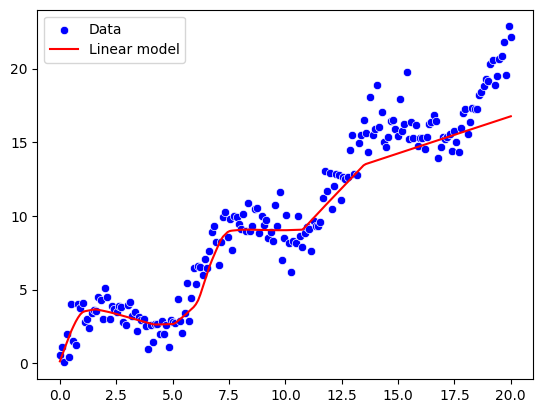

In [34]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
